In [559]:
import numpy as np
import pandas as pd
import glob as glob
import os as os
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

#Time Series
import statsmodels.tsa as tsa
from statsmodels.graphics.tsaplots import month_plot

#Functions
from sklearn.model_selection import train_test_split

#Regression
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

##### Read-in Main Data

#### Dummies

In [2]:
pwd

'J:\\Brainstation\\Capstone Git\\Apollo_Beach_Model - Copy\\notebooks'

In [3]:
os.chdir('J:\\Brainstation\\Capstone Git\\data\\PossibleDataSources\\Benthic Index\\OG_Results')
os.listdir()

['Benthic_BioDataSpreadsheet_ActualValuesCommunityStats2.csv',
 'Benthic_BioDataSpreadsheet_AdjustedValues.csv',
 'Benthic_BioHydrology.csv',
 'Benthic_BiologyListCorrected.csv',
 'Benthic_BioSampleCollectionInfo.csv',
 'Benthic_SedimentChemistryList.csv',
 'Benthic_SedimentChemistrySpreadsheet.csv',
 'Benthic_SiltClay.csv']

In [4]:
# Read BENTHIC biodata spreadsheet
# Includes cleaned data: Shannon Diversity Index
benX = pd.read_csv('Benthic_BioDataSpreadsheet_AdjustedValues.csv',encoding='cp1252', low_memory=False)

In [5]:
 os.chdir('J:\\Brainstation\\Capstone Git\\data\\PossibleDataSources\\nekton')

In [6]:
dir_list=os.listdir()

In [7]:
catch_sel=pd.read_csv('tbm_catch_selfactors.csv')

In [8]:
benX.SampleTime=pd.to_datetime(benX.SampleTime,format='mixed')
benX

ProgramName                                     FundingProject  \
0     Benthic Monitoring  TBEP                                          ...   
1     Benthic Monitoring  TBEP                                          ...   
2     Benthic Monitoring  TBEP                                          ...   
3     Benthic Monitoring  TBEP                                          ...   
4     Benthic Monitoring  TBEP                                          ...   
...                  ...                                                ...   
4782  Benthic Monitoring  TBEP-Special                                  ...   
4783  Benthic Monitoring  TBEP-Special                                  ...   
4784  Benthic Monitoring  TBEP-Special                                  ...   
4785  Benthic Monitoring  TBEP-Special                                  ...   
4786  Benthic Monitoring  TBEP                                          ...   

     AreaAbbr          AreaName Hexagon  Year          SampleTime  StationID  \
0          HB  Hillsborough Bay    HB34  1993 1993-09-14 11:33:00       2452   
1          HB  Hillsborough Bay    HB26  1993 1993-09-13 12:37:00       2453   
2          HB  Hillsborough Bay    HB25  1993 1993-09-09 12:17:00       2454   
3          HB  Hillsborough Bay    HB25  1993 1993-09-09 13:37:00       2455   
4          HB  Hillsborough Bay    HB32  1993 1993-09-09 15:00:00       2456   
...       ...               ...     ...   ...                 ...        ...   
4782      LTB   Lower Tampa Bay    TB61  2022 2022-08-22 10:14:00      13170   
4783      LTB   Lower Tampa Bay    TB61  2022 2022-08-22 12:50:00      13171   
4784      LTB   Lower Tampa Bay    TB61  2022 2022-08-22 13:55:00      13172   
4785      LTB   Lower Tampa Bay    TB61  2022 2022-08-22 11:28:00      13173   
4786      TCB    Terra Ceia Bay    MR20  2022 2022-09-19 09:48:00      13145   

     StationNumber   Latitude  Longitude  Temp-T  TempQ-T  Temp-B  TempQ-B  \
0           93HB03  27.874001 -82.418999   29.31      NaN   29.30      NaN   
1           93HB04  27.875000 -82.468002   29.89      NaN   29.36      NaN   
2           93HB05  27.867001 -82.485001   29.80      NaN   29.81      NaN   
3           93HB06  27.858000 -82.474999   29.95      NaN   29.44      NaN   
4           93HB07  27.850201 -82.454002   30.23      NaN   30.26      NaN   
...            ...        ...        ...     ...      ...     ...      ...   
4782       22PTF10  27.681600 -82.633117   30.57      NaN   30.87      NaN   
4783       22PTF11  27.683133 -82.633617   31.59      NaN   30.92      NaN   
4784       22PTF14  27.683400 -82.633650   30.90      NaN   30.88      NaN   
4785       22PTF15  27.682317 -82.633133   30.89      NaN   30.93      NaN   
4786       22TCB20  27.540900 -82.603500   29.03      NaN   29.22      NaN   

      DO-T DOQ-T  DO-B DOQ-B  DOp-T  DOp-B   Cond-T CondQ-T   Cond-B CondQ-B  \
0     6.39   NaN  5.42   NaN   95.0   80.7      NaN     NaN      NaN     NaN   
1     7.85   NaN  5.31   NaN  116.6   78.5      NaN     NaN      NaN     NaN   
2     6.90   NaN  6.88   NaN  104.1  103.8      NaN     NaN      NaN     NaN   
3     5.32   NaN  4.20   NaN   80.4   63.1      NaN     NaN      NaN     NaN   
4     6.72   NaN  0.31   NaN  102.0    4.8      NaN     NaN      NaN     NaN   
...    ...   ...   ...   ...    ...    ...      ...     ...      ...     ...   
4782  5.95   NaN  5.64   NaN   95.6   91.4  47100.0     NaN  47900.0     NaN   
4783  5.91   NaN  5.44   NaN   96.2   87.9  46200.0     NaN  46700.0     NaN   
4784  5.55   NaN  5.52   NaN   89.3   88.7  46400.0     NaN  46400.0     NaN   
4785  5.52   NaN  5.50   NaN   89.2   89.2  47100.0     NaN  47700.0     NaN   
4786  9.07   NaN  0.77   NaN  134.5   11.5  35100.0     NaN  42300.0     NaN   

      pH-T pHQ-T  pH-B pHQ-B  Sal-T  SalQ-T  Sal-B  SalQ-B Salinity-BCat  \
0     7.88   NaN  7.85   NaN  23.40     NaN  23.70     NaN    Polyhaline   
1     8.03   NaN  7.92   NaN  21.40     NaN  22.20   

In [9]:
pwd

'J:\\Brainstation\\Capstone Git\\data\\PossibleDataSources\\nekton'

In [10]:
dir_list

['.ipynb_checkpoints',
 '.RData',
 '.Rhistory',
 'nekton_fimsgdat.csv',
 'nekton_phy_tbni_sgrs.csv',
 'nekton_species_codes.csv',
 'nekton_tbm_c.csv',
 'nekton_tbm_c.xlsx',
 'species_codes.sas7bdat',
 'species_code_changes.sas7bdat',
 'tbm_catch_selfactors.csv',
 'tbm_catch_wfactors.csv',
 'tbm_combined_catch_env_factors.csv',
 'tbm_environment_wfactors.csv',
 'tbm_env_factors.csv',
 'tbm_l.csv',
 'tbniscr.RData',
 'Untitled.ipynb',
 'wq-dash']

In [11]:
catch_sel

Reference  Aca_quadricornis  Ach_lineatus  Achiridae_spp  \
0     TBM1998010906                 0             0              0   
1     TBM1998010910                 0             0              0   
2     TBM1998010912                 0             0              0   
3     TBM1998010914                 0             0              0   
4     TBM1998010915                 0             0              0   
...             ...               ...           ...            ...   
4570  TBM2021120704                 0             0              0   
4571  TBM2021120705                 0             3              0   
4572  TBM2021120802                 0             0              0   
4573  TBM2021120804                 1             0              0   
4574  TBM2021120805                 0             2              0   

      Adi_xenica  Aet_narinari  Albula_spp  Alu_schoepfii  Ana_criniger  \
0              0             0           0              0             0   
1              0             0           0              0             0   
2              0             0           0              0             0   
3              0             0           0              0             0   
4              0             0           0              0             0   
...          ...           ...         ...            ...           ...   
4570           0             0           0              0             0   
4571           0             0           0              0             0   
4572           0             0           0              0             0   
4573           0             0           0              0             0   
4574           0             0           0              0             0   

      Anc_cubana  Anc_hepsetus  Anc_lyolepis  Anc_mitchilli  Anchoa_spp  \
0              0             0             0             15           0   
1              0             0             0              0           0   
2              0             0             0              0           0   
3              0             0             0              0           0   
4              0             0             0              0           0   
...          ...           ...           ...            ...         ...   
4570           0             0             0              0           0   
4571           0             0             0              7           0   
4572           0             0             0              0           0   
4573           0             0             0              0           0   
4574           0             0             0              0           0   

      Arc_probatocephalus  Argopecten_spp  Ari_felis  Ast_y_graecum  \
0                       0               0          0              0   
1                       0               0          0              0   
2                       0               0          0              0   
3                       0               0          0              0   
4                       0               0          0              0   
...                   ...             ...        ...            ...   
4570                    0               0          0              0   
4571                    0               0          0              0   
4572                    0               0          0              0   
4573                    0               0          0              0   
4574                    0               0          0              0   

      Bag_marinus  Bai_chrysoura  Bat_soporator  Bathygobius_spp  \
0               0              0              0                0   
1               0              0              0                0   
2               0              0              0                0   
3               0              0              0                0   
4               0              0              0                0   
...           ...            ...            ...              ...   
4570            0              0      

In [12]:
catch_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4575 entries, 0 to 4574
Columns: 175 entries, Reference to DominantVeg
dtypes: float64(6), int64(165), object(4)
memory usage: 6.1+ MB


In [13]:
catch_sel.Season.unique()

array(['Winter', 'Spring', 'Summer', 'Fall'], dtype=object)

In [14]:
catch_sel['season_conv']=catch_sel.Season.map({'Spring':1,'Summer':2,'Fall':3,'Winter':4})
catch_sel.season_conv

0       4
1       4
2       4
3       4
4       4
       ..
4570    4
4571    4
4572    4
4573    4
4574    4
Name: season_conv, Length: 4575, dtype: int64

In [15]:
catch_sel.DominantVeg.fillna(0)

0                      0
1                      0
2                      0
3          Halodule spp.
4                      0
              ...       
4570                   0
4571       Halodule spp.
4572      Thalassia spp.
4573    Syringodium spp.
4574                 SAV
Name: DominantVeg, Length: 4575, dtype: object

##### Veg Dummies

In [560]:
#### Need to format data for regression

In [16]:
veg_dummies=pd.get_dummies(catch_sel.DominantVeg)

In [17]:
# Start creating dummies for veg
veg_dummies.columns.str.contains('halophila')

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [18]:
for col in veg_dummies.columns:
    veg_dummies.rename(columns={col:'v_'+ col.lower().replace(" ","_")},inplace=True)
veg_dummies

v_algae  v_algae:_filamentous_green  v_algae:_filamentous_red  \
0       False                       False                     False   
1       False                       False                     False   
2       False                       False                     False   
3       False                       False                     False   
4       False                       False                     False   
...       ...                         ...                       ...   
4570    False                       False                     False   
4571    False                       False                     False   
4572    False                       False                     False   
4573    False                       False                     False   
4574    False                       False                     False   

      v_caulerpa_spp.  v_gracillaria  v_halodule_spp.  \
0               False          False            False   
1               False          False            False   
2               False          False            False   
3               False          False             True   
4               False          False            False   
...               ...            ...              ...   
4570            False          False            False   
4571            False          False             True   
4572            False          False            False   
4573            False          False            False   
4574            False          False            False   

      v_halophila_decipiens_(paddle_grass)  \
0                                    False   
1                                    False   
2                                    False   
3                                    False   
4                                    False   
...                                    ...   
4570                                 False   
4571                                 False   
4572                                 False   
4573                                 False   
4574                                 False   

      v_halophila_engelmanii__(star_grass)  v_halophila_spp.  v_ruppia_spp.  \
0                                    False             False          False   
1                                    False             False          False   
2                                    False             False          False   
3                                    False             False          False   
4                                    False             False          False   
...                                    ...               ...            ...   
4570                                 False             False          False   
4571                                 False             False          False   
4572                                 False             False          False   
4573                                 False             False          False   
4574                                 False             False          False   

      v_sav  v_savalg  v_sargassum_spp  v_seagrasses:_mixed  \
0     False     False            False                False   
1     False     False            False                False   
2     False     False            False                False   
3     False     False            False                False   
4     False     False            False                False   
...     ...       ...              ...                  ...   
4570  False     False            False                False   
4571  False     False            False                False   
4572  False     False            False                False   
4573  False     False            False                False   
4574   True     False            False                False   

      v_seagrasses:_unidentified  v_syringodium_spp.  v_thalassia_spp.  
0                          False               False             False  
1                          False               False           

In [19]:
# Chose halophila as column to combine for dummies
# Get columns


In [20]:
#Combine 'halophila' columns
veg_dummies.iloc[:,8]=veg_dummies.iloc[:,8]+veg_dummies.iloc[:,7]+veg_dummies.iloc[:,6]

In [21]:
# Drop combined dummy columns
veg_dummies.drop(columns=['v_halophila_decipiens_(paddle_grass)', 'v_halophila_engelmanii__(star_grass)'],inplace=True)

In [22]:
veg_dummies

v_algae  v_algae:_filamentous_green  v_algae:_filamentous_red  \
0       False                       False                     False   
1       False                       False                     False   
2       False                       False                     False   
3       False                       False                     False   
4       False                       False                     False   
...       ...                         ...                       ...   
4570    False                       False                     False   
4571    False                       False                     False   
4572    False                       False                     False   
4573    False                       False                     False   
4574    False                       False                     False   

      v_caulerpa_spp.  v_gracillaria  v_halodule_spp.  v_halophila_spp.  \
0               False          False            False             False   
1               False          False            False             False   
2               False          False            False             False   
3               False          False             True             False   
4               False          False            False             False   
...               ...            ...              ...               ...   
4570            False          False            False             False   
4571            False          False             True             False   
4572            False          False            False             False   
4573            False          False            False             False   
4574            False          False            False             False   

      v_ruppia_spp.  v_sav  v_savalg  v_sargassum_spp  v_seagrasses:_mixed  \
0             False  False     False            False                False   
1             False  False     False            False                False   
2             False  False     False            False                False   
3             False  False     False            False                False   
4             False  False     False            False                False   
...             ...    ...       ...              ...                  ...   
4570          False  False     False            False                False   
4571          False  False     False            False                False   
4572          False  False     False            False                False   
4573          False  False     False            False                False   
4574          False   True     False            False                False   

      v_seagrasses:_unidentified  v_syringodium_spp.  v_thalassia_spp.  
0                          False               False             False  
1                          False               False             False  
2                          False               False             False  
3                          False               False             False  
4                          False               False             False  
...                          ...                 ...               ...  
4570                       False               False             False  
4571                       False               False             False  
4572                       False               False              True  
4573                       False                True             False  
4574                       False               False             False  

[4575 rows x 15 columns]

##### segment dummies

In [23]:
segment_dummies=pd.get_dummies(catch_sel.TBEP_seg)

##### season dummies

In [24]:
catch_sel.Season.value_counts()

Season
Summer    1535
Winter    1526
Fall       774
Spring     740
Name: count, dtype: int64

In [25]:
catch_sel[catch_sel.Reference.str.slice(-4).str.startswith('09')]

Reference  Aca_quadricornis  Ach_lineatus  Achiridae_spp  \
0     TBM1998010906                 0             0              0   
1     TBM1998010910                 0             0              0   
2     TBM1998010912                 0             0              0   
3     TBM1998010914                 0             0              0   
4     TBM1998010915                 0             0              0   
...             ...               ...           ...            ...   
4488  TBM2021070906                 0             0              0   
4522  TBM2021090904                 0             2              0   
4523  TBM2021090905                 0             4              0   
4524  TBM2021090907                 0             1              0   
4548  TBM2021110905                 0             0              0   

      Adi_xenica  Aet_narinari  Albula_spp  Alu_schoepfii  Ana_criniger  \
0              0             0           0              0             0   
1              0             0           0              0             0   
2              0             0           0              0             0   
3              0             0           0              0             0   
4              0             0           0              0             0   
...          ...           ...         ...            ...           ...   
4488           0             0           0              0             0   
4522           0             0           0              0             0   
4523           0             0           0              0             0   
4524           0             0           0              0             0   
4548           0             0           0              0             0   

      Anc_cubana  Anc_hepsetus  Anc_lyolepis  Anc_mitchilli  Anchoa_spp  \
0              0             0             0             15           0   
1              0             0             0              0           0   
2              0             0             0              0           0   
3              0             0             0              0           0   
4              0             0             0              0           0   
...          ...           ...           ...            ...         ...   
4488           0             0             0              0           0   
4522           0             0             0              0           0   
4523           0             0             0              0           0   
4524           0             0             0              0           0   
4548           0             0             0              0           0   

      Arc_probatocephalus  Argopecten_spp  Ari_felis  Ast_y_graecum  \
0                       0               0          0              0   
1                       0               0          0              0   
2                       0               0          0              0   
3                       0               0          0              0   
4                       0               0          0              0   
...                   ...             ...        ...            ...   
4488                    0               0          0              0   
4522                    0               0          0              0   
4523                    0               0          0              0   
4524                    0               0          0              0   
4548                    0               0          0              0   

      Bag_marinus  Bai_chrysoura  Bat_soporator  Bathygobius_spp  \
0               0              0              0                0   
1               0              0              0                0   
2               0              0              0                0   
3               0              0              0                0   
4               0              0              0                0   
...           ...            ...            ...              ...   
4488            0              0      

In [26]:
catch_sel=pd.concat([catch_sel.Reference.str.slice(start=-6,stop=-4),catch_sel],axis=1)

In [27]:
catch_sel.iloc[:,0]=catch_sel.iloc[:,0].rename('month',inplace=True)

In [28]:
catch_sel.sgyear

0       1999
1       1999
2       1999
3       1999
4       1999
        ... 
4570    2022
4571    2022
4572    2022
4573    2022
4574    2022
Name: sgyear, Length: 4575, dtype: int64

In [29]:
catch_sel

Reference      Reference  Aca_quadricornis  Ach_lineatus  Achiridae_spp  \
0           01  TBM1998010906                 0             0              0   
1           01  TBM1998010910                 0             0              0   
2           01  TBM1998010912                 0             0              0   
3           01  TBM1998010914                 0             0              0   
4           01  TBM1998010915                 0             0              0   
...        ...            ...               ...           ...            ...   
4570        12  TBM2021120704                 0             0              0   
4571        12  TBM2021120705                 0             3              0   
4572        12  TBM2021120802                 0             0              0   
4573        12  TBM2021120804                 1             0              0   
4574        12  TBM2021120805                 0             2              0   

      Adi_xenica  Aet_narinari  Albula_spp  Alu_schoepfii  Ana_criniger  \
0              0             0           0              0             0   
1              0             0           0              0             0   
2              0             0           0              0             0   
3              0             0           0              0             0   
4              0             0           0              0             0   
...          ...           ...         ...            ...           ...   
4570           0             0           0              0             0   
4571           0             0           0              0             0   
4572           0             0           0              0             0   
4573           0             0           0              0             0   
4574           0             0           0              0             0   

      Anc_cubana  Anc_hepsetus  Anc_lyolepis  Anc_mitchilli  Anchoa_spp  \
0              0             0             0             15           0   
1              0             0             0              0           0   
2              0             0             0              0           0   
3              0             0             0              0           0   
4              0             0             0              0           0   
...          ...           ...           ...            ...         ...   
4570           0             0             0              0           0   
4571           0             0             0              7           0   
4572           0             0             0              0           0   
4573           0             0             0              0           0   
4574           0             0             0              0           0   

      Arc_probatocephalus  Argopecten_spp  Ari_felis  Ast_y_graecum  \
0                       0               0          0              0   
1                       0               0          0              0   
2                       0               0          0              0   
3                       0               0          0              0   
4                       0               0          0              0   
...                   ...             ...        ...            ...   
4570                    0               0          0              0   
4571                    0               0          0              0   
4572                    0               0          0              0   
4573                    0               0          0              0   
4574                    0               0          0              0   

      Bag_marinus  Bai_chrysoura  Bat_soporator  Bathygobius_spp  \
0               0              0              0                0   
1               0              0              0                0   
2               0              0              0                0   
3               0              0              0                0   
4               0              0              0  

In [30]:
catch_sel.columns.values[0]='month'

In [31]:
season_dummies=pd.get_dummies(catch_sel.Season)

##### Data Formatting

In [32]:
catch_sel_vals=catch_sel.drop(columns=['Reference','Season','TBEP_seg','FLUCCSCODE'])


In [33]:
catch_sel_vals=pd.concat([catch_sel_vals,veg_dummies,season_dummies,segment_dummies],axis=1).drop(columns=['DominantVeg','season_conv'])

In [34]:
data_dic_dummies=pd.DataFrame()
column_type=pd.Series()
column_names=pd.Series()
type_count=0
name_count=0
for col in catch_sel_vals.columns:
    column_names[name_count]=col
    column_type[type_count]=catch_sel_vals[col].dtype
    type_count+=1
    name_count+=1


In [35]:
data_dic_dummies=pd.DataFrame()
data_dic_dummies['col_name']=column_names
data_dic_dummies['col_type']=column_type

In [36]:
data_dic_dummies['organism_type']=0
data_dic_dummies['organism_type']=data_dic_dummies['organism_type'].astype(str)

In [37]:
#data_dic_dummies[data_dic_dummies.col_name.str.startswith('v')==True]
data_dic_dummies.iloc[170:185,2]='aq_veg'

In [38]:
for col in catch_sel_vals.iloc[:,170:194]:
    catch_sel_vals[col]=catch_sel_vals[col].astype('int')

In [39]:
#pd.concat([catch_sel_cont,pd.get_dummies(catch_sel.TBEP_seg),pd.get_dummies(catch_sel.DominantVeg)],axis=1)

In [40]:
catch_sel_vals

month  Aca_quadricornis  Ach_lineatus  Achiridae_spp  Adi_xenica  \
0       01                 0             0              0           0   
1       01                 0             0              0           0   
2       01                 0             0              0           0   
3       01                 0             0              0           0   
4       01                 0             0              0           0   
...    ...               ...           ...            ...         ...   
4570    12                 0             0              0           0   
4571    12                 0             3              0           0   
4572    12                 0             0              0           0   
4573    12                 1             0              0           0   
4574    12                 0             2              0           0   

      Aet_narinari  Albula_spp  Alu_schoepfii  Ana_criniger  Anc_cubana  \
0                0           0              0             0           0   
1                0           0              0             0           0   
2                0           0              0             0           0   
3                0           0              0             0           0   
4                0           0              0             0           0   
...            ...         ...            ...           ...         ...   
4570             0           0              0             0           0   
4571             0           0              0             0           0   
4572             0           0              0             0           0   
4573             0           0              0             0           0   
4574             0           0              0             0           0   

      Anc_hepsetus  Anc_lyolepis  Anc_mitchilli  Anchoa_spp  \
0                0             0             15           0   
1                0             0              0           0   
2                0             0              0           0   
3                0             0              0           0   
4                0             0              0           0   
...            ...           ...            ...         ...   
4570             0             0              0           0   
4571             0             0              7           0   
4572             0             0              0           0   
4573             0             0              0           0   
4574             0             0              0           0   

      Arc_probatocephalus  Argopecten_spp  Ari_felis  Ast_y_graecum  \
0                       0               0          0              0   
1                       0               0          0              0   
2                       0               0          0              0   
3                       0               0          0              0   
4                       0               0          0              0   
...                   ...             ...        ...            ...   
4570                    0               0          0              0   
4571                    0               0          0              0   
4572                    0               0          0              0   
4573                    0               0          0              0   
4574                    0               0          0              0   

      Bag_marinus  Bai_chrysoura  Bat_soporator  Bathygobius_spp  \
0               0              0              0                0   
1               0              0              0                0   
2               0              0              0                0   
3               0              0              0                0   
4               0              0              0                0   
...           ...            ...            ...              ...   
4570            0              0              0                0   
4571            0              0              0                0   
4572 

In [41]:
catch_sel.iloc[:,1].str.slice(start=3,stop=7)

0       1998
1       1998
2       1998
3       1998
4       1998
        ... 
4570    2021
4571    2021
4572    2021
4573    2021
4574    2021
Name: Reference, Length: 4575, dtype: object

##### Benthic Data

In [42]:
benX_primary=pd.concat([benX.iloc[:,0:19],benX.iloc[:,245:253]],axis=1)

In [43]:
benX_primary['month']=benX_primary.SampleTime.dt.month

In [44]:
#benX_primary=benX_primary[benX_primary.AreaAbbr.isin(['MTB','OTB','LTB','HB'])]

In [45]:
benX_primary.drop(columns=['ProgramName','FundingProject','AreaName'],inplace=True)

In [46]:
benX_primary.Year.max()

2022

In [47]:
benX_primary[abs((benX_primary['Temp-T']-benX_primary['Temp-B'])/benX_primary['Temp-T'])>0.05].month.value_counts()

month
8     228
9      94
5      44
10     41
7      22
6       4
4       2
2       1
Name: count, dtype: int64

In [48]:
#benX_sindex=benX_primary.groupby(['Year','month','StationID','Temp-T','Temp-B','AreaAbbr']).ShannonDiversity.mean().reset_index()
benX_sindex=benX_primary.groupby(['Year','month','AreaAbbr'])[['ShannonDiversity','Temp-T','Temp-B']].mean().reset_index()

In [49]:
benX_sindex.sort_values(by=['Year','month'])

Year  month AreaAbbr  ShannonDiversity     Temp-T     Temp-B
0    1993      9       HB          0.557895  29.755263  29.806842
1    1993      9      LTB          0.552353  29.864118  29.557059
2    1993      9      MTB          0.623000  29.999000  29.735500
3    1993      9      OTB          0.607500  29.100000  28.949333
4    1993     10       MR          0.572727  26.960000  26.981818
..    ...    ...      ...               ...        ...        ...
392  2022      8      LTB          0.519500  30.422000  30.467500
393  2022      8      MTB          0.542500  30.166250  30.077500
394  2022      8      OTB          0.510000  30.475714  30.305714
395  2022      9       MR          0.618750  29.317500  28.842500
396  2022      9      TCB          0.650000  29.030000  29.220000

[397 rows x 6 columns]

In [50]:
benX_sindex['ym']=benX_sindex.Year.astype(str)+'-'+benX_sindex.month.astype(str)

In [51]:
#sns.lineplot(x=pd.concat([benX_sindex.Year,benX_sindex.month]),y=benX_sindex.ShannonDiversity,hue=benX_sindex.AreaAbbr)

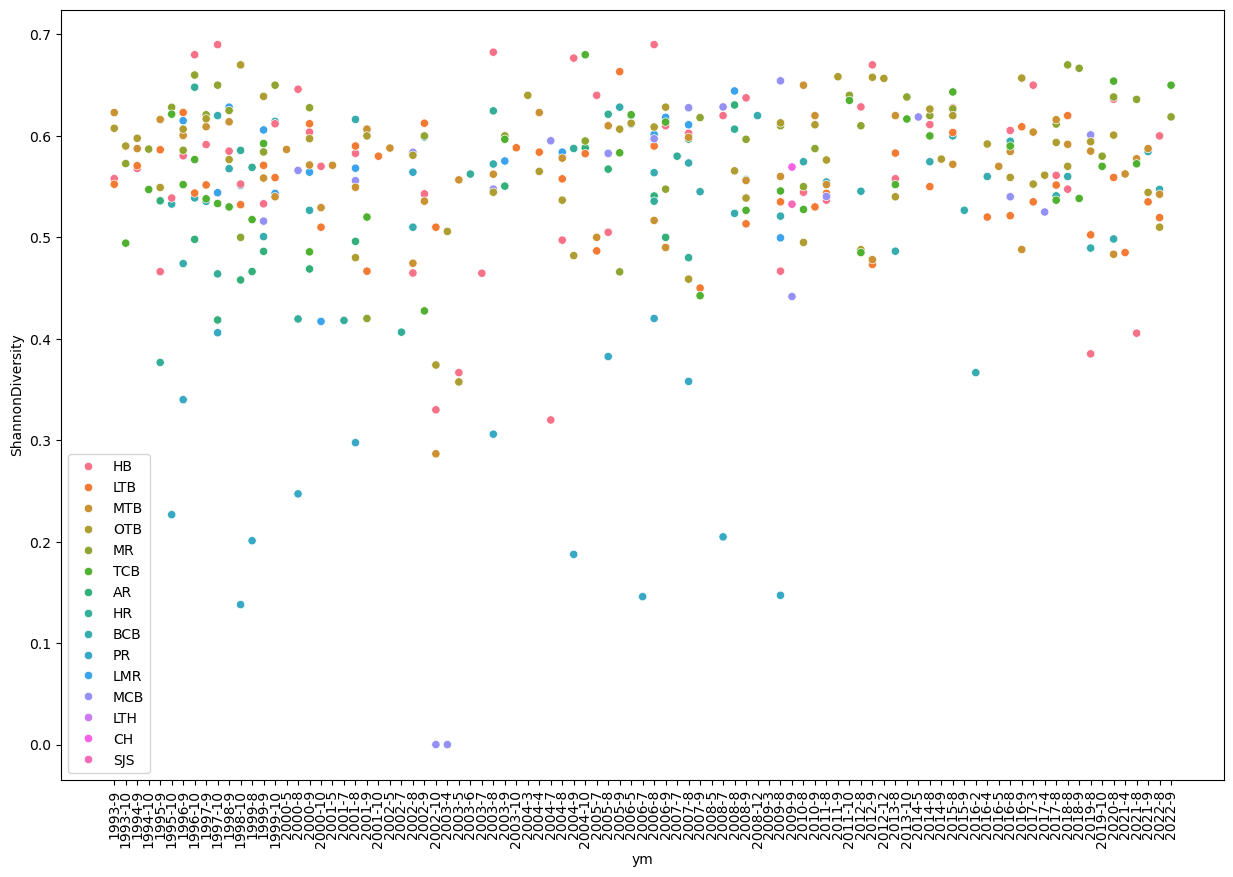

In [52]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='ym',y='ShannonDiversity',data=benX_sindex,hue='AreaAbbr')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [53]:
"""
There's going to be an issue with missing months in sampling of benthic data. There is no consistency and looking how erratic the data is already
imputation might not be the best idea.

I'm going to put this on hold and calculate the Shannon Diversity Index for the Nekton species
"""

"\nThere's going to be an issue with missing months in sampling of benthic data. There is no consistency and looking how erratic the data is already\nimputation might not be the best idea.\n\nI'm going to put this on hold and calculate the Shannon Diversity Index for the Nekton species\n"

##### Nekton Shannon Diversity Index (frequency, richness, abundance)


In [54]:
#Reorganizing
catch_sel_vals.drop(columns='sgyear',inplace=True)
catch_sel_vals.drop(columns='areas',inplace=True)
catch_sel_vals.drop(columns='month',inplace=True)
catch_sel_vals=pd.concat([catch_sel_vals,catch_sel.sgyear],axis=1)
catch_sel_vals=pd.concat([catch_sel_vals,catch_sel.areas],axis=1)
catch_sel_vals=pd.concat([catch_sel_vals,catch_sel.month],axis=1)

In [55]:
catch_sel_vals

Aca_quadricornis  Ach_lineatus  Achiridae_spp  Adi_xenica  Aet_narinari  \
0                    0             0              0           0             0   
1                    0             0              0           0             0   
2                    0             0              0           0             0   
3                    0             0              0           0             0   
4                    0             0              0           0             0   
...                ...           ...            ...         ...           ...   
4570                 0             0              0           0             0   
4571                 0             3              0           0             0   
4572                 0             0              0           0             0   
4573                 1             0              0           0             0   
4574                 0             2              0           0             0   

      Albula_spp  Alu_schoepfii  Ana_criniger  Anc_cubana  Anc_hepsetus  \
0              0              0             0           0             0   
1              0              0             0           0             0   
2              0              0             0           0             0   
3              0              0             0           0             0   
4              0              0             0           0             0   
...          ...            ...           ...         ...           ...   
4570           0              0             0           0             0   
4571           0              0             0           0             0   
4572           0              0             0           0             0   
4573           0              0             0           0             0   
4574           0              0             0           0             0   

      Anc_lyolepis  Anc_mitchilli  Anchoa_spp  Arc_probatocephalus  \
0                0             15           0                    0   
1                0              0           0                    0   
2                0              0           0                    0   
3                0              0           0                    0   
4                0              0           0                    0   
...            ...            ...         ...                  ...   
4570             0              0           0                    0   
4571             0              7           0                    0   
4572             0              0           0                    0   
4573             0              0           0                    0   
4574             0              0           0                    0   

      Argopecten_spp  Ari_felis  Ast_y_graecum  Bag_marinus  Bai_chrysoura  \
0                  0          0              0            0              0   
1                  0          0              0            0              0   
2                  0          0              0            0              0   
3                  0          0              0            0              0   
4                  0          0              0            0              0   
...              ...        ...            ...          ...            ...   
4570               0          0              0            0              0   
4571               0          0              0            0              0   
4572               0          0              0            0              0   
4573               0          0              0            0              2   
4574               0          0              0            0              0   

      Bat_soporator  Bathygobius_spp  Brevoortia_spp  Cal_arctifrons  \
0                 0                0               0               0   
1                 0                0               0               0   
2                 0                0               0               0   
3                 0                0               0              

##### Catch Frequency 

In [56]:
#Checking for last
catch_sel.columns[176]

'season_conv'

In [57]:
# Drop non-animal species or columns
catch_freq_stage=catch_sel.drop(columns=catch_sel.columns[170:177])
catch_freq_stage

month      Reference  Aca_quadricornis  Ach_lineatus  Achiridae_spp  \
0       01  TBM1998010906                 0             0              0   
1       01  TBM1998010910                 0             0              0   
2       01  TBM1998010912                 0             0              0   
3       01  TBM1998010914                 0             0              0   
4       01  TBM1998010915                 0             0              0   
...    ...            ...               ...           ...            ...   
4570    12  TBM2021120704                 0             0              0   
4571    12  TBM2021120705                 0             3              0   
4572    12  TBM2021120802                 0             0              0   
4573    12  TBM2021120804                 1             0              0   
4574    12  TBM2021120805                 0             2              0   

      Adi_xenica  Aet_narinari  Albula_spp  Alu_schoepfii  Ana_criniger  \
0              0             0           0              0             0   
1              0             0           0              0             0   
2              0             0           0              0             0   
3              0             0           0              0             0   
4              0             0           0              0             0   
...          ...           ...         ...            ...           ...   
4570           0             0           0              0             0   
4571           0             0           0              0             0   
4572           0             0           0              0             0   
4573           0             0           0              0             0   
4574           0             0           0              0             0   

      Anc_cubana  Anc_hepsetus  Anc_lyolepis  Anc_mitchilli  Anchoa_spp  \
0              0             0             0             15           0   
1              0             0             0              0           0   
2              0             0             0              0           0   
3              0             0             0              0           0   
4              0             0             0              0           0   
...          ...           ...           ...            ...         ...   
4570           0             0             0              0           0   
4571           0             0             0              7           0   
4572           0             0             0              0           0   
4573           0             0             0              0           0   
4574           0             0             0              0           0   

      Arc_probatocephalus  Argopecten_spp  Ari_felis  Ast_y_graecum  \
0                       0               0          0              0   
1                       0               0          0              0   
2                       0               0          0              0   
3                       0               0          0              0   
4                       0               0          0              0   
...                   ...             ...        ...            ...   
4570                    0               0          0              0   
4571                    0               0          0              0   
4572                    0               0          0              0   
4573                    0               0          0              0   
4574                    0               0          0              0   

      Bag_marinus  Bai_chrysoura  Bat_soporator  Bathygobius_spp  \
0               0              0              0                0   
1               0              0              0                0   
2               0              0              0                0   
3               0              0              0                0   
4               0              0              0                0   
...           ...            

In [58]:
#drop first 2 columns
catch_freq_stage.drop(columns=['month','Reference'],inplace=True)

In [59]:
catch_freq_stage

Aca_quadricornis  Ach_lineatus  Achiridae_spp  Adi_xenica  Aet_narinari  \
0                    0             0              0           0             0   
1                    0             0              0           0             0   
2                    0             0              0           0             0   
3                    0             0              0           0             0   
4                    0             0              0           0             0   
...                ...           ...            ...         ...           ...   
4570                 0             0              0           0             0   
4571                 0             3              0           0             0   
4572                 0             0              0           0             0   
4573                 1             0              0           0             0   
4574                 0             2              0           0             0   

      Albula_spp  Alu_schoepfii  Ana_criniger  Anc_cubana  Anc_hepsetus  \
0              0              0             0           0             0   
1              0              0             0           0             0   
2              0              0             0           0             0   
3              0              0             0           0             0   
4              0              0             0           0             0   
...          ...            ...           ...         ...           ...   
4570           0              0             0           0             0   
4571           0              0             0           0             0   
4572           0              0             0           0             0   
4573           0              0             0           0             0   
4574           0              0             0           0             0   

      Anc_lyolepis  Anc_mitchilli  Anchoa_spp  Arc_probatocephalus  \
0                0             15           0                    0   
1                0              0           0                    0   
2                0              0           0                    0   
3                0              0           0                    0   
4                0              0           0                    0   
...            ...            ...         ...                  ...   
4570             0              0           0                    0   
4571             0              7           0                    0   
4572             0              0           0                    0   
4573             0              0           0                    0   
4574             0              0           0                    0   

      Argopecten_spp  Ari_felis  Ast_y_graecum  Bag_marinus  Bai_chrysoura  \
0                  0          0              0            0              0   
1                  0          0              0            0              0   
2                  0          0              0            0              0   
3                  0          0              0            0              0   
4                  0          0              0            0              0   
...              ...        ...            ...          ...            ...   
4570               0          0              0            0              0   
4571               0          0              0            0              0   
4572               0          0              0            0              0   
4573               0          0              0            0              2   
4574               0          0              0            0              0   

      Bat_soporator  Bathygobius_spp  Brevoortia_spp  Cal_arctifrons  \
0                 0                0               0               0   
1                 0                0               0               0   
2                 0                0               0               0   
3                 0                0               0              

In [60]:
# Get proportions of nekton species, sum across row = 1
# Deal with NaN values. Will encounter div/0 errors
freq=catch_freq_stage.div(catch_freq_stage.sum(axis=1), axis=0)
freq=freq.fillna(0)
freq

Aca_quadricornis  Ach_lineatus  Achiridae_spp  Adi_xenica  Aet_narinari  \
0             0.000000      0.000000            0.0         0.0           0.0   
1             0.000000      0.000000            0.0         0.0           0.0   
2             0.000000      0.000000            0.0         0.0           0.0   
3             0.000000      0.000000            0.0         0.0           0.0   
4             0.000000      0.000000            0.0         0.0           0.0   
...                ...           ...            ...         ...           ...   
4570          0.000000      0.000000            0.0         0.0           0.0   
4571          0.000000      0.015789            0.0         0.0           0.0   
4572          0.000000      0.000000            0.0         0.0           0.0   
4573          0.020408      0.000000            0.0         0.0           0.0   
4574          0.000000      0.400000            0.0         0.0           0.0   

      Albula_spp  Alu_schoepfii  Ana_criniger  Anc_cubana  Anc_hepsetus  \
0            0.0            0.0           0.0         0.0           0.0   
1            0.0            0.0           0.0         0.0           0.0   
2            0.0            0.0           0.0         0.0           0.0   
3            0.0            0.0           0.0         0.0           0.0   
4            0.0            0.0           0.0         0.0           0.0   
...          ...            ...           ...         ...           ...   
4570         0.0            0.0           0.0         0.0           0.0   
4571         0.0            0.0           0.0         0.0           0.0   
4572         0.0            0.0           0.0         0.0           0.0   
4573         0.0            0.0           0.0         0.0           0.0   
4574         0.0            0.0           0.0         0.0           0.0   

      Anc_lyolepis  Anc_mitchilli  Anchoa_spp  Arc_probatocephalus  \
0              0.0       0.882353         0.0                  0.0   
1              0.0       0.000000         0.0                  0.0   
2              0.0       0.000000         0.0                  0.0   
3              0.0       0.000000         0.0                  0.0   
4              0.0       0.000000         0.0                  0.0   
...            ...            ...         ...                  ...   
4570           0.0       0.000000         0.0                  0.0   
4571           0.0       0.036842         0.0                  0.0   
4572           0.0       0.000000         0.0                  0.0   
4573           0.0       0.000000         0.0                  0.0   
4574           0.0       0.000000         0.0                  0.0   

      Argopecten_spp  Ari_felis  Ast_y_graecum  Bag_marinus  Bai_chrysoura  \
0                0.0        0.0            0.0          0.0       0.000000   
1                0.0        0.0            0.0          0.0       0.000000   
2                0.0        0.0            0.0          0.0       0.000000   
3                0.0        0.0            0.0          0.0       0.000000   
4                0.0        0.0            0.0          0.0       0.000000   
...              ...        ...            ...          ...            ...   
4570             0.0        0.0            0.0          0.0       0.000000   
4571             0.0        0.0            0.0          0.0       0.000000   
4572             0.0        0.0            0.0          0.0       0.000000   
4573             0.0        0.0            0.0          0.0       0.040816   
4574             0.0        0.0            0.0          0.0       0.000000   

      Bat_soporator  Bathygobius_spp  Brevoortia_spp  Cal_arctifrons  \
0               0.0              0.0             0.0             0.0   
1               0.0              0.0             0.0             0.0   
2               0.0              0.0             0.0             0.0   
3               0.0              0.0             0.0             0

In [61]:
# Get proportion freq for all nekton species


In [62]:
freq.loc[1].isna()==True

Aca_quadricornis    False
Ach_lineatus        False
Achiridae_spp       False
Adi_xenica          False
Aet_narinari        False
                    ...  
Tra_carolinus       False
Tra_falcatus        False
Tri_maculatus       False
Tyl_crocodilus      False
Uro_floridana       False
Name: 1, Length: 168, dtype: bool

In [63]:
shannon= -(freq * np.log(freq)).sum(axis=1)

C:\Users\Ajax\miniconda3\envs\bs\Lib\site-packages\pandas\core\internals\blocks.py:393: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


In [64]:
shannon

0       0.362211
1      -0.000000
2      -0.000000
3       0.693147
4       1.162226
          ...   
4570    0.688567
4571    1.589084
4572    1.332179
4573    2.264088
4574    1.054920
Length: 4575, dtype: float64

##### VIF check: Checking for MultiColinearity

In [65]:
catch_sel_vals.iloc[:,170]

0       0
1       0
2       0
3       0
4       0
       ..
4570    0
4571    0
4572    0
4573    0
4574    0
Name: v_algae:_filamentous_red, Length: 4575, dtype: int32

In [66]:
non_num=[]
for i in catch_sel_vals.columns:
    if catch_sel_vals[i].dtype == 'object':
        non_num.append(i)

In [67]:
non_num

['month']

In [68]:
catch_sel_vals['month']=catch_sel_vals.month.astype('int')

In [69]:
catch_sel_vals.columns[168]

'v_algae'

In [70]:
VIFcheck=catch_sel_vals.drop(columns=catch_sel_vals.columns[168:194])

In [71]:
VIFcheck_withconstant=sm.add_constant(VIFcheck)

In [72]:
for i in VIFcheck_withconstant.columns:
    print(VIFcheck_withconstant[i].dtype)
    print(VIFcheck_withconstant[i].dtype not in ('float64','int64'))

float64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
float64
False
float64
False
float64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
float64
False
int64
False
float64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int64
False
int6

In [73]:
VIF_coef=pd.Series([variance_inflation_factor(VIFcheck_withconstant.values, i)
          for i in range(VIFcheck_withconstant.shape[1])],
         index=VIFcheck_withconstant.columns)[1:] # leaving out the constant

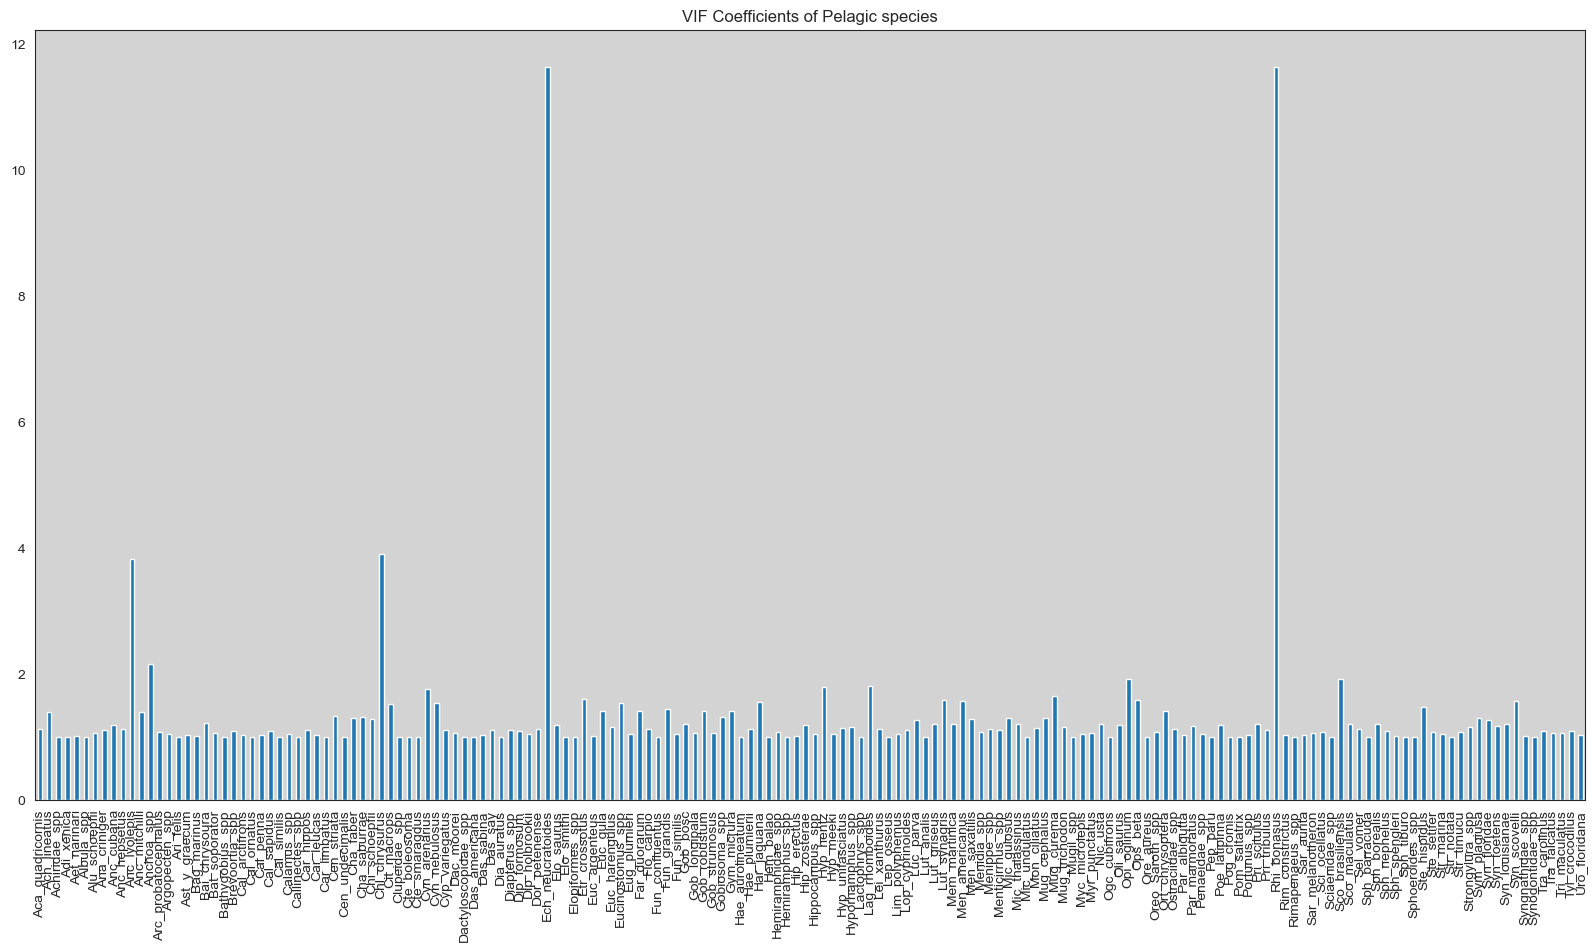

In [601]:
plt.figure(figsize=(20,10))
VIF_coef.plot(kind='bar')
plt.title('VIF Coefficients of Pelagic species')
plt.show()

In [75]:
VIF_coef[VIF_coef>3]

Anc_lyolepis         3.836255
Chl_chrysurus        3.909879
Ech_neucratoides    11.639851
Rhi_bonasus         11.646314
dtype: float64

In [76]:
multico_col=VIF_coef[VIF_coef>3]

In [77]:
multico_col.info()

<class 'pandas.core.series.Series'>
Index: 4 entries, Anc_lyolepis to Rhi_bonasus
Series name: None
Non-Null Count  Dtype  
--------------  -----  
4 non-null      float64
dtypes: float64(1)
memory usage: 64.0+ bytes


##### PCA (ended up being useless)

In [78]:
multico_col

Anc_lyolepis         3.836255
Chl_chrysurus        3.909879
Ech_neucratoides    11.639851
Rhi_bonasus         11.646314
dtype: float64

In [79]:
shannon

0       0.362211
1      -0.000000
2      -0.000000
3       0.693147
4       1.162226
          ...   
4570    0.688567
4571    1.589084
4572    1.332179
4573    2.264088
4574    1.054920
Length: 4575, dtype: float64

In [80]:
multico_col=multico_col.reset_index(name='VIF_coef')

In [81]:
multico_col.rename(columns={'index': 'species'},inplace=True )

In [82]:
freq[multico_col.species].sum()

Anc_lyolepis        0.001590
Chl_chrysurus       3.105227
Ech_neucratoides    0.021739
Rhi_bonasus         4.646536
dtype: float64

In [83]:
shannon=pd.Series(shannon)

In [84]:
catch_sel_vals=pd.concat([catch_sel_vals,shannon],axis=1).rename(columns={0:'shannon'})

In [85]:
catch_sel_vals.OTB=catch_sel_vals.OTB.astype(int)

In [379]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(catch_sel_vals.drop(columns='shannon'), catch_sel_vals.shannon, test_size=0.2, random_state=42)

In [372]:
myLasso_nekton=Lasso()
myRidge_nekton=Ridge()

In [381]:
myLasso_nekton.fit(X_train,y_train)
myRidge_nekton.fit(X_train,y_train)

Ridge()

In [382]:
myLasso_nekton.score(X_test,y_test)

-7.798142002424235e-05

In [383]:
myRidge_nekton.score(X_test,y_test)

-2.873901988658714

In [384]:
myLasso_nekton.coef_

array([ 0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,
        0., -0.,  0., -0.,  0.,  0., -0.,  0.,  0.,  0., -0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0., -0.,  0., -0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
       -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,
       -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0., -0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0., -0.,
        0.,  0.,  0.,  0., -0., -0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,
        0.,  0.,  0.,  0., -0.,  0.,  0., -0.,  0.,  0., -0.,  0., -0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,  0., -0., -0.,
       -0., -0.,  0., -0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0

In [ ]:
myRidge_nekton

In [380]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [88]:
from sklearn.decomposition import PCA

# Create the PCA - we will retain the same number of components as our input variables
my_pca = PCA(n_components=100)
my_pca.fit(X_train)
X_PCA=my_pca.transform(X_train)

In [89]:
my_pca3D = PCA(n_components=3)
my_pca3D.fit(X_train)
X_PCA3D=my_pca3D.transform(X_train)

In [90]:
X_PCA

array([[-0.30893289, -0.47661834,  0.34964873, ...,  0.00311358,
         0.0286419 ,  0.10319131],
       [-0.8418328 , -0.5599577 ,  0.89674082, ...,  0.04573803,
        -0.04384761,  0.10714894],
       [ 0.17641027, -0.65245307,  0.36428149, ..., -0.1397307 ,
        -0.18442215,  0.12691149],
       ...,
       [-1.40109569,  0.41963312,  2.48317399, ...,  0.27101523,
         0.15688373, -0.02924368],
       [ 0.11660483,  2.38329859, -0.31298804, ...,  0.29887122,
        -0.34172371,  0.43288061],
       [ 0.56148699, -1.10356711,  0.19491423, ..., -2.91950707,
        -1.65765755,  0.05876643]])

In [91]:
X_PCA3D

array([[-0.30893289, -0.47661834,  0.34964873],
       [-0.8418328 , -0.5599577 ,  0.89674082],
       [ 0.17641027, -0.65245307,  0.36428149],
       ...,
       [-1.40109569,  0.41963312,  2.48317399],
       [ 0.11660483,  2.38329859, -0.31298804],
       [ 0.56148699, -1.10356711,  0.19491423]])

In [92]:
my_pca.explained_variance_ratio_[0]

0.020938652756011773

In [ ]:
cum_sum=0
n_components=1
for i in range(0,100):
    cum_sum=cum_sum+my_pca.explained_variance_ratio_[i]
    print(f'Number of Components: {n_components}')
    print(round(cum_sum,5))
    n_components+=1    

__Doing the rest of the PCA seems like it won't provide much information. 20 components only explains 21.7%.<br>
When 100 components were calculated, it still didn't reach 70% <br>
However, a 3D plot of the first 3 PC does look a lot more relevant than non-scaled data.__

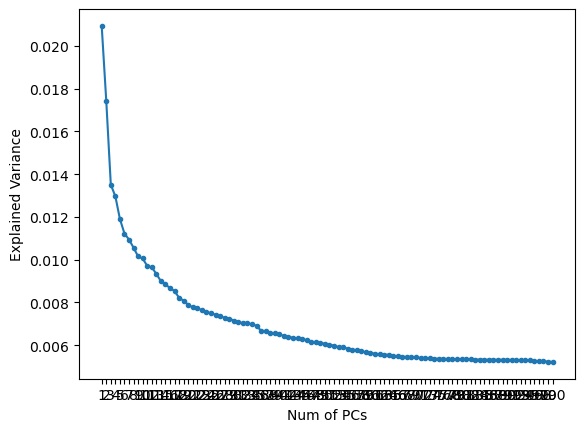

In [94]:
plt.figure()
plt.plot(np.arange(100)+1, my_pca.explained_variance_ratio_, marker = '.')
plt.xticks(np.arange(100)+1)
plt.ylabel('Explained Variance')
plt.xlabel('Num of PCs')
plt.show()

In [95]:
PCA3D = pd.DataFrame(data=X_PCA3D, columns=['PC1', 'PC2', 'PC3'])

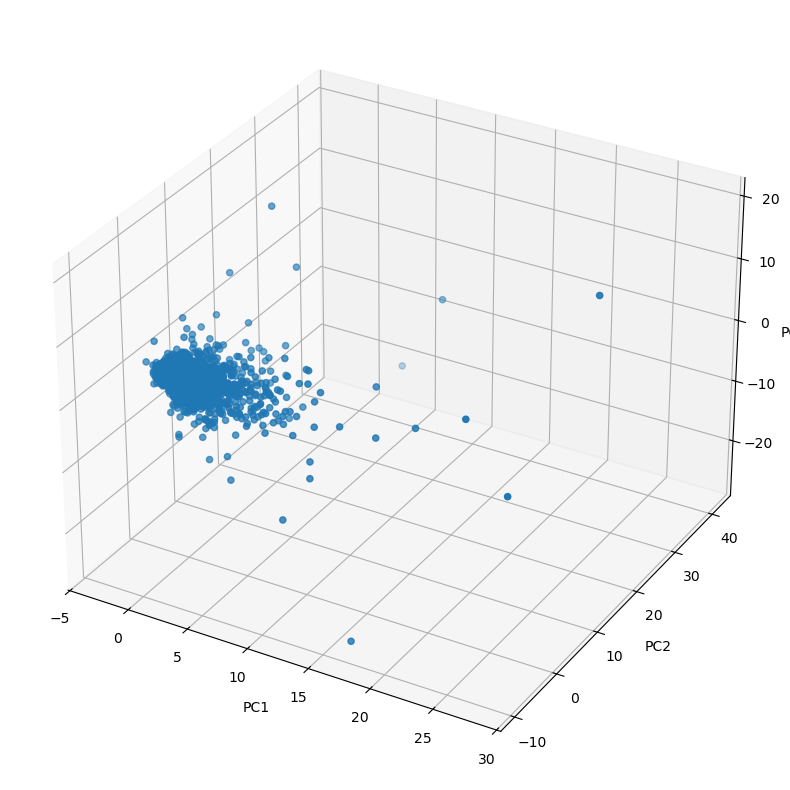

In [96]:
fig = plt.figure(figsize=(10,10,))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(PCA3D['PC1'], PCA3D['PC2'], PCA3D['PC3'])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

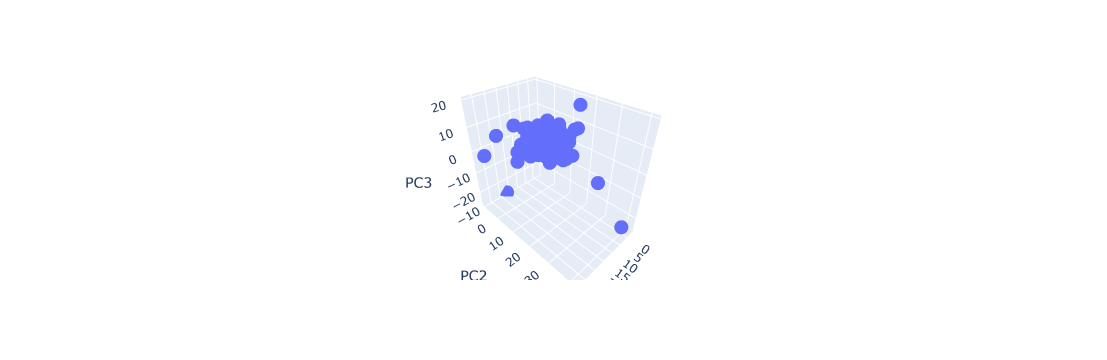

<Figure size 1000x1000 with 0 Axes>

In [97]:
import plotly.express as px
fig=plt.figure(figsize=(10,10))
fig = px.scatter_3d(PCA3D, x='PC1', y='PC2', z='PC3')
fig.show()

In [98]:
my_pca3D = PCA(n_components=3)
my_pca3D.fit(X_train)
X_PCA3D=my_pca3D.transform(X_train)

In [99]:
X_PCA

array([[-0.30893289, -0.47661834,  0.34964873, ...,  0.00311358,
         0.0286419 ,  0.10319131],
       [-0.8418328 , -0.5599577 ,  0.89674082, ...,  0.04573803,
        -0.04384761,  0.10714894],
       [ 0.17641027, -0.65245307,  0.36428149, ..., -0.1397307 ,
        -0.18442215,  0.12691149],
       ...,
       [-1.40109569,  0.41963312,  2.48317399, ...,  0.27101523,
         0.15688373, -0.02924368],
       [ 0.11660483,  2.38329859, -0.31298804, ...,  0.29887122,
        -0.34172371,  0.43288061],
       [ 0.56148699, -1.10356711,  0.19491423, ..., -2.91950707,
        -1.65765755,  0.05876643]])

In [100]:
"""
Before scaling, it looked like onlt 100 components explained 70% of the data.
"""

'\nBefore scaling, it looked like onlt 100 components explained 70% of the data.\n'

In [101]:
my_pca5 = PCA(n_components=5)
my_pca5.fit(X_train)
X_PCA5=my_pca5.transform(catch_sel_vals.drop(columns='shannon'))

C:\Users\Ajax\miniconda3\envs\bs\Lib\site-packages\sklearn\base.py:486: UserWarning:

X has feature names, but PCA was fitted without feature names



In [102]:
X_PCA5

array([[  -8.84132463,  -72.04857644,   24.41794395,   15.22130717,
        -105.24072356],
       [ -11.69969393,  -72.01970132,   23.44692998,   11.82410624,
        -105.32094301],
       [ -11.95796118,  -71.9885351 ,   23.46822794,   11.85790268,
        -105.28396478],
       ...,
       [ -10.58564569,  -71.45117253,   18.9158919 ,   13.21633614,
        -107.18561537],
       [  -1.57158295,  -71.74449648,   23.01137899,    9.69493869,
        -107.61706131],
       [ -10.04163576,  -72.10984277,   19.30175926,   13.00086305,
        -107.397504  ]])

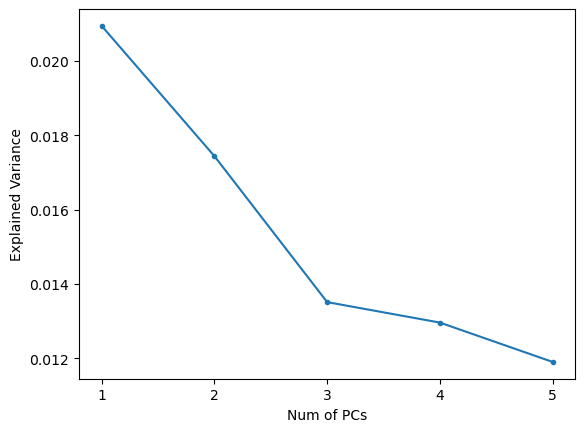

In [103]:
plt.figure()
plt.plot(np.arange(5)+1, my_pca5.explained_variance_ratio_, marker = '.')
plt.xticks(np.arange(5)+1)
plt.ylabel('Explained Variance')
plt.xlabel('Num of PCs')
plt.show()

In [104]:
X_PCA5_df=pd.DataFrame(X_PCA5, columns=['PCA-1', 'PCA-2','PCA-3','PCA-4','PCA-5'])

In [105]:
X_PCA5_df['shannon']=catch_sel_vals['shannon']

In [106]:
X_PCA5_df['shannon']=catch_sel_vals['shannon']

In [107]:
X_PCA5_df.isna().sum()

PCA-1      0
PCA-2      0
PCA-3      0
PCA-4      0
PCA-5      0
shannon    0
dtype: int64

In [108]:
PCA_DF=pd.DataFrame(X_PCA)

In [109]:
E = H / ln(k)

NameError: name 'H' is not defined

In [ ]:
PCA_DF

In [110]:
my_pca.explained_variance_ratio_

array([0.02093865, 0.01743772, 0.01351384, 0.01296366, 0.01190606,
       0.01122407, 0.01094361, 0.01055977, 0.01015256, 0.0100578 ,
       0.00970787, 0.00964545, 0.00933558, 0.00899738, 0.00884683,
       0.00867228, 0.00853647, 0.00821578, 0.00808214, 0.00788865,
       0.0077692 , 0.00774816, 0.00762503, 0.00754837, 0.00750593,
       0.00742204, 0.00735219, 0.0072861 , 0.00724879, 0.00715303,
       0.00707325, 0.00703842, 0.00702898, 0.00697908, 0.00691017,
       0.00667312, 0.00665155, 0.00656241, 0.00655305, 0.00650364,
       0.00643847, 0.00639537, 0.00635067, 0.00631802, 0.00628814,
       0.0062402 , 0.00615903, 0.00613374, 0.00612131, 0.00606627,
       0.00603118, 0.00598058, 0.00591421, 0.0059112 , 0.00583802,
       0.00579595, 0.00576945, 0.00573959, 0.005661  , 0.00563824,
       0.00561095, 0.00557392, 0.00556439, 0.00555316, 0.00551145,
       0.00547441, 0.00546365, 0.00545409, 0.00543318, 0.00542712,
       0.00540927, 0.00538715, 0.00538193, 0.00537283, 0.00536

In [111]:
X_train_PCA=my_pca.transform(X_train)

In [112]:
X_test_PCA=my_pca.transform(X_test)

In [113]:
from sklearn.linear_model import LinearRegression
LinReg=LinearRegression()
LinReg.fit(X_train_PCA,y_train)

LinearRegression()

In [114]:
y_pred_train=LinReg.predict(X_train_PCA)

In [115]:
y_pred_train=LinReg.predict(X_test_PCA)

In [116]:
LinReg.score(X_train_PCA,y_train)

0.25350355413809744

In [117]:
#Results
# n_components =20, score= 0.195
# n_components = 100, score=0.2535

Nitrates and Phosphates

In [118]:
os.chdir('J:\\Brainstation\\Capstone Git\\data\\human Imact')

In [119]:
NP_Means=pd.read_csv('nitrate_phosphate_totals_1990_2024.csv')

In [120]:
NP_Means

Unnamed: 0  year  month      ym  ResultValue2  ActivityDepth   Latitude  \
0             0  1990      1  1990_1      0.682750       2.319250  27.795134   
1             1  1990      2  1990_2      0.847750       2.451250  27.792931   
2             2  1990      3  1990_3      0.641500       2.362000  27.792931   
3             3  1990      4  1990_4      0.630976       2.224878  27.794969   
4             4  1990      5  1990_5      0.676829       2.543902  27.794969   
..          ...   ...    ...     ...           ...            ...        ...   
411         411  2024      4  2024_4      0.442958       2.052083  27.795194   
412         412  2024      5  2024_5      0.330565       2.039130  27.800788   
413         413  2024      6  2024_6      0.355957       2.219565  27.800788   
414         414  2024      7  2024_7      0.182000       2.494118  27.778137   
415         415  2024      8  2024_8      0.189706       2.612353  27.778137   

     Longitude  pyear  pmonth pResultUnit      Phos    p_ym  
0   -82.504102   1990       1        mg/l  0.525385  1990_1  
1   -82.504449   1990       2        mg/l  0.534000  1990_2  
2   -82.504449   1990       3        mg/l  0.469091  1990_3  
3   -82.502239   1990       4        mg/l  0.529375  1990_4  
4   -82.502239   1990       5        mg/l  0.649000  1990_5  
..         ...    ...     ...         ...       ...     ...  
411 -82.496064   2024       4        mg/l  0.129429  2024_4  
412 -82.493325   2024       5        mg/l  0.111750  2024_5  
413 -82.493325   2024       6        mg/l  0.112889  2024_6  
414 -82.513610   2024       7        mg/l  0.124333  2024_7  
415 -82.513610   2024       8        mg/l  0.342667  2024_8  

[416 rows x 13 columns]

In [121]:
NP_Means.rename(columns={'ResultValue2':'Nit'},inplace=True)

In [122]:
NP_Means.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 416 entries, 0 to 415
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     416 non-null    int64  
 1   year           416 non-null    int64  
 2   month          416 non-null    int64  
 3   ym             416 non-null    object 
 4   Nit            416 non-null    float64
 5   ActivityDepth  416 non-null    float64
 6   Latitude       416 non-null    float64
 7   Longitude      416 non-null    float64
 8   pyear          416 non-null    int64  
 9   pmonth         416 non-null    int64  
 10  pResultUnit    416 non-null    object 
 11  Phos           416 non-null    float64
 12  p_ym           416 non-null    object 
dtypes: float64(5), int64(5), object(3)
memory usage: 42.4+ KB


In [123]:
NP_means=NP_Means.iloc[:,[1,2,3,4,11,5,6,7]]

In [124]:
NP_means

year  month      ym       Nit      Phos  ActivityDepth   Latitude  \
0    1990      1  1990_1  0.682750  0.525385       2.319250  27.795134   
1    1990      2  1990_2  0.847750  0.534000       2.451250  27.792931   
2    1990      3  1990_3  0.641500  0.469091       2.362000  27.792931   
3    1990      4  1990_4  0.630976  0.529375       2.224878  27.794969   
4    1990      5  1990_5  0.676829  0.649000       2.543902  27.794969   
..    ...    ...     ...       ...       ...            ...        ...   
411  2024      4  2024_4  0.442958  0.129429       2.052083  27.795194   
412  2024      5  2024_5  0.330565  0.111750       2.039130  27.800788   
413  2024      6  2024_6  0.355957  0.112889       2.219565  27.800788   
414  2024      7  2024_7  0.182000  0.124333       2.494118  27.778137   
415  2024      8  2024_8  0.189706  0.342667       2.612353  27.778137   

     Longitude  
0   -82.504102  
1   -82.504449  
2   -82.504449  
3   -82.502239  
4   -82.502239  
..         ...  
411 -82.496064  
412 -82.493325  
413 -82.493325  
414 -82.513610  
415 -82.513610  

[416 rows x 8 columns]

### Nitrates, Phosphates, Nekton, Benthic

In [125]:
"""
Key Tables:
NP_means
"""

'\nKey Tables:\nNP_means\n'

In [126]:
catch_sel_vals

Aca_quadricornis  Ach_lineatus  Achiridae_spp  Adi_xenica  Aet_narinari  \
0                    0             0              0           0             0   
1                    0             0              0           0             0   
2                    0             0              0           0             0   
3                    0             0              0           0             0   
4                    0             0              0           0             0   
...                ...           ...            ...         ...           ...   
4570                 0             0              0           0             0   
4571                 0             3              0           0             0   
4572                 0             0              0           0             0   
4573                 1             0              0           0             0   
4574                 0             2              0           0             0   

      Albula_spp  Alu_schoepfii  Ana_criniger  Anc_cubana  Anc_hepsetus  \
0              0              0             0           0             0   
1              0              0             0           0             0   
2              0              0             0           0             0   
3              0              0             0           0             0   
4              0              0             0           0             0   
...          ...            ...           ...         ...           ...   
4570           0              0             0           0             0   
4571           0              0             0           0             0   
4572           0              0             0           0             0   
4573           0              0             0           0             0   
4574           0              0             0           0             0   

      Anc_lyolepis  Anc_mitchilli  Anchoa_spp  Arc_probatocephalus  \
0                0             15           0                    0   
1                0              0           0                    0   
2                0              0           0                    0   
3                0              0           0                    0   
4                0              0           0                    0   
...            ...            ...         ...                  ...   
4570             0              0           0                    0   
4571             0              7           0                    0   
4572             0              0           0                    0   
4573             0              0           0                    0   
4574             0              0           0                    0   

      Argopecten_spp  Ari_felis  Ast_y_graecum  Bag_marinus  Bai_chrysoura  \
0                  0          0              0            0              0   
1                  0          0              0            0              0   
2                  0          0              0            0              0   
3                  0          0              0            0              0   
4                  0          0              0            0              0   
...              ...        ...            ...          ...            ...   
4570               0          0              0            0              0   
4571               0          0              0            0              0   
4572               0          0              0            0              0   
4573               0          0              0            0              2   
4574               0          0              0            0              0   

      Bat_soporator  Bathygobius_spp  Brevoortia_spp  Cal_arctifrons  \
0                 0                0               0               0   
1                 0                0               0               0   
2                 0                0               0               0   
3                 0                0               0              

In [127]:
ym=catch_sel_vals.sgyear.astype(str)+'_'+catch_sel_vals.month.astype(str)

In [128]:
ym.unique()

array(['1999_1', '1999_2', '1999_3', '1999_4', '1999_5', '1999_6',
       '1999_7', '1999_8', '1999_9', '1999_10', '1999_11', '1999_12',
       '2001_1', '2001_2', '2001_3', '2001_4', '2001_5', '2001_6',
       '2001_7', '2001_8', '2001_9', '2001_10', '2001_11', '2001_12',
       '2004_1', '2004_2', '2004_3', '2004_4', '2004_5', '2004_6',
       '2004_7', '2004_8', '2004_9', '2004_10', '2004_11', '2004_12',
       '2006_1', '2006_2', '2006_3', '2006_4', '2006_5', '2006_6',
       '2006_7', '2006_8', '2006_9', '2006_10', '2006_11', '2006_12',
       '2008_1', '2008_2', '2008_3', '2008_4', '2008_5', '2008_6',
       '2008_7', '2008_8', '2008_9', '2008_10', '2008_11', '2008_12',
       '2010_1', '2010_2', '2010_3', '2010_4', '2010_5', '2010_6',
       '2010_7', '2010_8', '2010_9', '2010_10', '2010_11', '2010_12',
       '2012_1', '2012_2', '2012_3', '2012_4', '2012_5', '2012_6',
       '2012_7', '2012_8', '2012_9', '2012_10', '2012_11', '2012_12',
       '2014_1', '2014_2', '2014_3', '201

In [129]:
catch_sel_vals.sgyear.unique()

array([1999, 2001, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018, 2020,
       2022], dtype=int64)

In [130]:
vals_1999=catch_sel_vals[catch_sel_vals['sgyear']==1999]

<Axes: xlabel='month'>

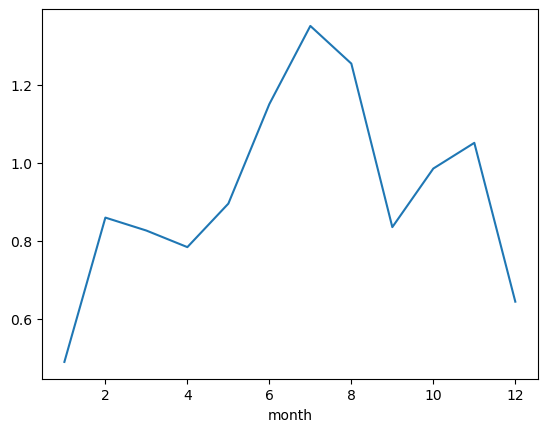

In [131]:
vals_1999.groupby('month').shannon.mean().plot()

In [132]:
SDI_means=catch_sel_vals.groupby(['month','sgyear']).shannon.mean().reset_index().sort_values(by=['sgyear','month'])

In [133]:
SDI_means

month  sgyear   shannon
0        1    1999  0.489115
12       2    1999  0.859081
24       3    1999  0.825866
36       4    1999  0.783379
48       5    1999  0.894913
..     ...     ...       ...
95       8    2022  0.985419
107      9    2022  1.037126
119     10    2022  0.909193
131     11    2022  0.818095
143     12    2022  1.055173

[144 rows x 3 columns]

In [134]:
years=SDI_means.sgyear.unique()

In [135]:
SDI_means_2=SDI_means.copy()
SDI_means_2.head(3)

month  sgyear   shannon
0       1    1999  0.489115
12      2    1999  0.859081
24      3    1999  0.825866

In [136]:
ddyear_counter=1

In [137]:
SDI_means_2.sgyear=SDI_means_2.sgyear.map({
    1999:1,
    2001:2,
    2004:3,
    2006:4,
    2008:5,
    2010:6,
    2012:7,
    2014:8,
    2016:9,
    2018:10,
    2020:11,
    2022:12d
    })

SyntaxError: invalid decimal literal (30097503.py, line 13)

In [138]:
SDI_means_2

month  sgyear   shannon
0        1    1999  0.489115
12       2    1999  0.859081
24       3    1999  0.825866
36       4    1999  0.783379
48       5    1999  0.894913
..     ...     ...       ...
95       8    2022  0.985419
107      9    2022  1.037126
119     10    2022  0.909193
131     11    2022  0.818095
143     12    2022  1.055173

[144 rows x 3 columns]

In [139]:
SDI_means_2

month  sgyear   shannon
0        1    1999  0.489115
12       2    1999  0.859081
24       3    1999  0.825866
36       4    1999  0.783379
48       5    1999  0.894913
..     ...     ...       ...
95       8    2022  0.985419
107      9    2022  1.037126
119     10    2022  0.909193
131     11    2022  0.818095
143     12    2022  1.055173

[144 rows x 3 columns]

<Axes: xlabel='month', ylabel='shannon'>

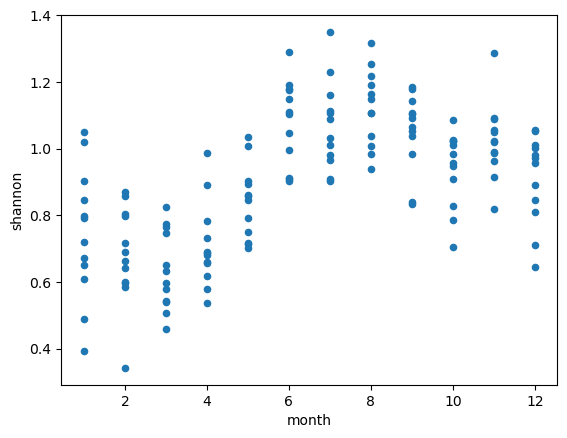

In [140]:
SDI_means.plot('month','shannon',kind='scatter')

C:\Users\Ajax\AppData\Local\Temp\ipykernel_45136\1446467906.py:2: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.

C:\Users\Ajax\AppData\Local\Temp\ipykernel_45136\1446467906.py:6: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



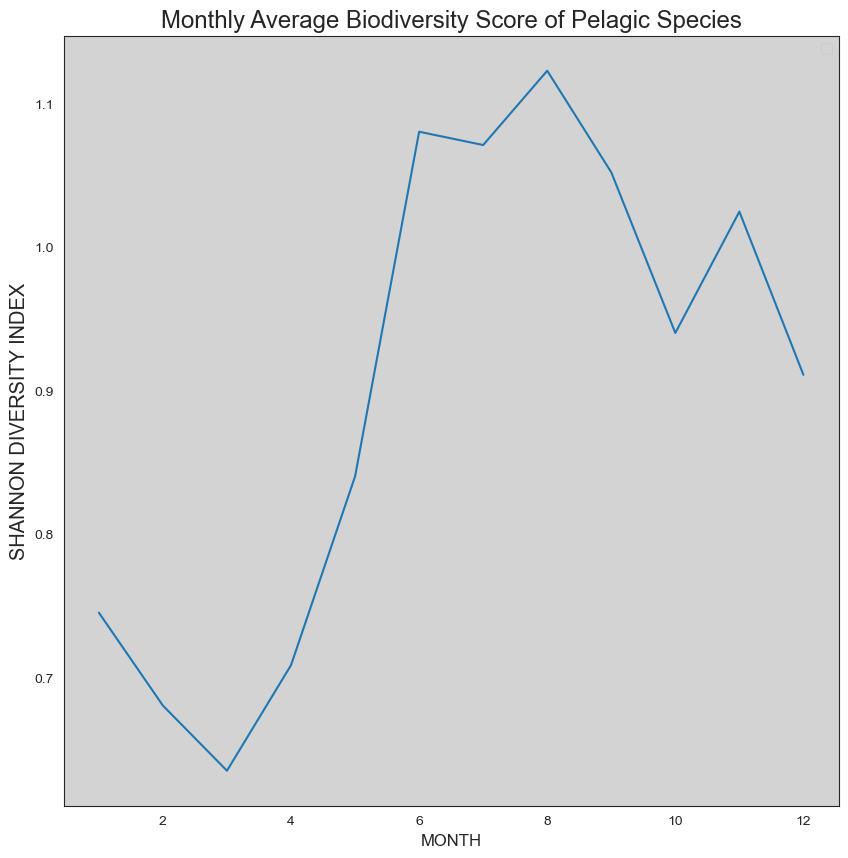

In [587]:
plt.figure(figsize=(10,10))
sns.lineplot(x='month',y='shannon',data=monthly_average,palette='viridis')
plt.title('Monthly Average Biodiversity Score of Pelagic Species',fontsize='xx-large')
plt.xlabel('MONTH',fontsize='large')
plt.ylabel('SHANNON DIVERSITY INDEX', fontsize='x-large')
plt.legend()
plt.show()

In [565]:
monthly_average_sdi=SDI_means.groupby('month').shannon.mean()

In [576]:
monthly_average=pd.DataFrame(monthly_average_sdi.reset_index())
monthly_average

month   shannon
0       1  0.745361
1       2  0.680621
2       3  0.635257
3       4  0.708820
4       5  0.840306
5       6  1.080407
6       7  1.071142
7       8  1.122901
8       9  1.052118
9      10  0.940210
10     11  1.024737
11     12  0.911063

In [142]:
SDI_means_2['monthyr']=SDI_means_2.month.astype(str)+'_'+SDI_means_2.sgyear.astype(str)
SDI_means_2['ym']=SDI_means_2.sgyear.astype(str)+'_'+SDI_means_2.month.astype(str)
SDI_means_2

month  sgyear   shannon  monthyr       ym
0        1    1999  0.489115   1_1999   1999_1
12       2    1999  0.859081   2_1999   1999_2
24       3    1999  0.825866   3_1999   1999_3
36       4    1999  0.783379   4_1999   1999_4
48       5    1999  0.894913   5_1999   1999_5
..     ...     ...       ...      ...      ...
95       8    2022  0.985419   8_2022   2022_8
107      9    2022  1.037126   9_2022   2022_9
119     10    2022  0.909193  10_2022  2022_10
131     11    2022  0.818095  11_2022  2022_11
143     12    2022  1.055173  12_2022  2022_12

[144 rows x 5 columns]

In [143]:
benX_match_nekton=benX_sindex[benX_sindex.Year.isin(years)]

In [144]:
benX_match_nekton

Year  month AreaAbbr  ShannonDiversity     Temp-T     Temp-B      ym
73   1999      8       AR          0.466296  29.028519  29.180000  1999-8
74   1999      8       HR          0.569000  28.804500  29.049500  1999-8
75   1999      8       PR          0.201000  30.941000  30.619500  1999-8
76   1999      8      TCB          0.517500  31.500000  31.250000  1999-8
77   1999      9       AR          0.486154  29.002308  29.672308  1999-9
..    ...    ...      ...               ...        ...        ...     ...
392  2022      8      LTB          0.519500  30.422000  30.467500  2022-8
393  2022      8      MTB          0.542500  30.166250  30.077500  2022-8
394  2022      8      OTB          0.510000  30.475714  30.305714  2022-8
395  2022      9       MR          0.618750  29.317500  28.842500  2022-9
396  2022      9      TCB          0.650000  29.030000  29.220000  2022-9

[167 rows x 7 columns]

In [145]:
benX_match_nekton['year_seq']=benX_match_nekton.Year.map({
    1999:1,
    2001:2,
    2004:3,
    2006:4,
    2008:5,
    2010:6,
    2012:7,
    2014:8,
    2016:9,
    2018:10,
    2020:11,
    2022:12
    })

C:\Users\Ajax\AppData\Local\Temp\ipykernel_45136\1958726963.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [146]:
benX_match_nekton

Year  month AreaAbbr  ShannonDiversity     Temp-T     Temp-B      ym  \
73   1999      8       AR          0.466296  29.028519  29.180000  1999-8   
74   1999      8       HR          0.569000  28.804500  29.049500  1999-8   
75   1999      8       PR          0.201000  30.941000  30.619500  1999-8   
76   1999      8      TCB          0.517500  31.500000  31.250000  1999-8   
77   1999      9       AR          0.486154  29.002308  29.672308  1999-9   
..    ...    ...      ...               ...        ...        ...     ...   
392  2022      8      LTB          0.519500  30.422000  30.467500  2022-8   
393  2022      8      MTB          0.542500  30.166250  30.077500  2022-8   
394  2022      8      OTB          0.510000  30.475714  30.305714  2022-8   
395  2022      9       MR          0.618750  29.317500  28.842500  2022-9   
396  2022      9      TCB          0.650000  29.030000  29.220000  2022-9   

     year_seq  
73          1  
74          1  
75          1  
76          1  
77          1  
..        ...  
392        12  
393        12  
394        12  
395        12  
396        12  

[167 rows x 8 columns]

In [147]:
#year_seq=pd.Series()

In [148]:
year_seq=benX_match_nekton['year_seq'].astype(int)

In [149]:
benX_match_nekton['year_seq_month']=benX_match_nekton.year_seq.astype(str)+'_'+benX_match_nekton.month.astype(str)

C:\Users\Ajax\AppData\Local\Temp\ipykernel_45136\3808030496.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [150]:
benX_AreaMean=benX_match_nekton.groupby(['Year','month','year_seq_month']).ShannonDiversity.mean().reset_index()

In [151]:
benX_AreaMean.head(3)

Year  month year_seq_month  ShannonDiversity
0  1999      8            1_8          0.438449
1  1999      9            1_9          0.558688
2  1999     10           1_10          0.586418

In [152]:
benX_yrmonth=benX_match_nekton.year_seq.astype(str)+'_'+benX_match_nekton.month.astype(str)

In [153]:
benX_match_nekton.head(3)

Year  month AreaAbbr  ShannonDiversity     Temp-T   Temp-B      ym  \
73  1999      8       AR          0.466296  29.028519  29.1800  1999-8   
74  1999      8       HR          0.569000  28.804500  29.0495  1999-8   
75  1999      8       PR          0.201000  30.941000  30.6195  1999-8   

    year_seq year_seq_month  
73         1            1_8  
74         1            1_8  
75         1            1_8

In [154]:
benX_AreaMean

Year  month year_seq_month  ShannonDiversity
0   1999      8            1_8          0.438449
1   1999      9            1_9          0.558688
2   1999     10           1_10          0.586418
3   2001      5            2_5          0.571034
4   2001      7            2_7          0.418125
5   2001      8            2_8          0.532607
6   2001      9            2_9          0.536389
7   2001     10           2_10          0.580000
8   2004      3            3_3          0.640000
9   2004      4            3_4          0.590667
10  2004      7            3_7          0.457600
11  2004      8            3_8          0.555614
12  2004      9            3_9          0.483438
13  2004     10           3_10          0.611414
14  2006      5            4_5          0.616250
15  2006      7            4_7          0.145833
16  2006      8            4_8          0.566423
17  2006      9            4_9          0.562225
18  2008      5            5_5               NaN
19  2008      7            5_7          0.484444
20  2008      8            5_8          0.594124
21  2008      9            5_9          0.560845
22  2008     12           5_12          0.620000
23  2010      8            6_8          0.570213
24  2010      9            6_9          0.587125
25  2012      8            7_8          0.551377
26  2012      9            7_9          0.569778
27  2012     12           7_12          0.656667
28  2014      5            8_5          0.618667
29  2014      8            8_8          0.597447
30  2014      9            8_9          0.577143
31  2016      2            9_2          0.366667
32  2016      4            9_4          0.557333
33  2016      5            9_5          0.570000
34  2016      8            9_8          0.572788
35  2016      9            9_9          0.584667
36  2018      8           10_8          0.593194
37  2018      9           10_9          0.602500
38  2020      8           11_8          0.581430
39  2022      8           12_8          0.543855
40  2022      9           12_9          0.634375

In [155]:
#############
NP_means
#############
## Sequencing years for Nit-Phos

year  month      ym       Nit      Phos  ActivityDepth   Latitude  \
0    1990      1  1990_1  0.682750  0.525385       2.319250  27.795134   
1    1990      2  1990_2  0.847750  0.534000       2.451250  27.792931   
2    1990      3  1990_3  0.641500  0.469091       2.362000  27.792931   
3    1990      4  1990_4  0.630976  0.529375       2.224878  27.794969   
4    1990      5  1990_5  0.676829  0.649000       2.543902  27.794969   
..    ...    ...     ...       ...       ...            ...        ...   
411  2024      4  2024_4  0.442958  0.129429       2.052083  27.795194   
412  2024      5  2024_5  0.330565  0.111750       2.039130  27.800788   
413  2024      6  2024_6  0.355957  0.112889       2.219565  27.800788   
414  2024      7  2024_7  0.182000  0.124333       2.494118  27.778137   
415  2024      8  2024_8  0.189706  0.342667       2.612353  27.778137   

     Longitude  
0   -82.504102  
1   -82.504449  
2   -82.504449  
3   -82.502239  
4   -82.502239  
..         ...  
411 -82.496064  
412 -82.493325  
413 -82.493325  
414 -82.513610  
415 -82.513610  

[416 rows x 8 columns]

In [156]:
NP_means['year_seq']=NP_means.year.map({
    1999:1,
    2001:2,
    2004:3,
    2006:4,
    2008:5,
    2010:6,
    2012:7,
    2014:8,
    2016:9,
    2018:10,
    2020:11,
    2022:12
    })

C:\Users\Ajax\AppData\Local\Temp\ipykernel_45136\3799716401.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [157]:
##Create a matching table for Nekton/Benthic
NP_match=NP_means[NP_means.year.isin(years)]

In [158]:
NP_match.shape

(144, 9)

In [159]:
SDI_means_2.shape

(144, 5)

In [160]:
benX_AreaMean.shape

(41, 4)

In [161]:
benX_sindex.Year.value_counts().count()

30

In [162]:
NP_match.year_seq=NP_match.year_seq.astype(int)

C:\Users\Ajax\AppData\Local\Temp\ipykernel_45136\2956619232.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [163]:
NP_match['ym_seq']=NP_match.year_seq.astype(str)+'_'+NP_match.month.astype(str)

C:\Users\Ajax\AppData\Local\Temp\ipykernel_45136\1873409731.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [164]:
NP_match.reset_index(drop=True,inplace=True)
SDI_means_2.reset_index(drop=True,inplace=True)
NP_match

year  month       ym       Nit      Phos  ActivityDepth   Latitude  \
0    1999      1   1999_1  0.642960  0.155000       1.430417  27.818557   
1    1999      2   1999_2  0.516667  0.217500       0.971111  27.812085   
2    1999      3   1999_3  0.589455  0.227500       0.881905  27.803355   
3    1999      4   1999_4  0.621739  0.248571       1.461739  27.823980   
4    1999      5   1999_5  0.725000  0.171818       1.437778  27.816501   
..    ...    ...      ...       ...       ...            ...        ...   
139  2022      8   2022_8  0.413314  0.121000       1.568571  27.798501   
140  2022      9   2022_9  0.440909  0.241167       1.513636  27.798483   
141  2022     10  2022_10  0.349529  0.376714       1.497059  27.790141   
142  2022     11  2022_11  0.515480  0.114714       1.782000  27.804925   
143  2022     12  2022_12  0.402571  0.157556       1.410000  27.796729   

     Longitude  year_seq ym_seq  
0   -82.497083         1    1_1  
1   -82.487398         1    1_2  
2   -82.518752         1    1_3  
3   -82.498598         1    1_4  
4   -82.488693         1    1_5  
..         ...       ...    ...  
139 -82.522758        12   12_8  
140 -82.520057        12   12_9  
141 -82.519279        12  12_10  
142 -82.486603        12  12_11  
143 -82.521432        12  12_12  

[144 rows x 10 columns]

In [165]:
NP_nekton=pd.concat([NP_match,SDI_means_2.shannon],axis=1)
NP_nekton.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           144 non-null    int64  
 1   month          144 non-null    int64  
 2   ym             144 non-null    object 
 3   Nit            144 non-null    float64
 4   Phos           144 non-null    float64
 5   ActivityDepth  144 non-null    float64
 6   Latitude       144 non-null    float64
 7   Longitude      144 non-null    float64
 8   year_seq       144 non-null    int32  
 9   ym_seq         144 non-null    object 
 10  shannon        144 non-null    float64
dtypes: float64(6), int32(1), int64(2), object(2)
memory usage: 11.9+ KB


In [166]:
NP_nekton.index=NP_nekton.ym

In [167]:
NP_nekton

year  month       ym       Nit      Phos  ActivityDepth   Latitude  \
ym                                                                            
1999_1   1999      1   1999_1  0.642960  0.155000       1.430417  27.818557   
1999_2   1999      2   1999_2  0.516667  0.217500       0.971111  27.812085   
1999_3   1999      3   1999_3  0.589455  0.227500       0.881905  27.803355   
1999_4   1999      4   1999_4  0.621739  0.248571       1.461739  27.823980   
1999_5   1999      5   1999_5  0.725000  0.171818       1.437778  27.816501   
...       ...    ...      ...       ...       ...            ...        ...   
2022_8   2022      8   2022_8  0.413314  0.121000       1.568571  27.798501   
2022_9   2022      9   2022_9  0.440909  0.241167       1.513636  27.798483   
2022_10  2022     10  2022_10  0.349529  0.376714       1.497059  27.790141   
2022_11  2022     11  2022_11  0.515480  0.114714       1.782000  27.804925   
2022_12  2022     12  2022_12  0.402571  0.157556       1.410000  27.796729   

         Longitude  year_seq ym_seq   shannon  
ym                                             
1999_1  -82.497083         1    1_1  0.489115  
1999_2  -82.487398         1    1_2  0.859081  
1999_3  -82.518752         1    1_3  0.825866  
1999_4  -82.498598         1    1_4  0.783379  
1999_5  -82.488693         1    1_5  0.894913  
...            ...       ...    ...       ...  
2022_8  -82.522758        12   12_8  0.985419  
2022_9  -82.520057        12   12_9  1.037126  
2022_10 -82.519279        12  12_10  0.909193  
2022_11 -82.486603        12  12_11  0.818095  
2022_12 -82.521432        12  12_12  1.055173  

[144 rows x 11 columns]

In [168]:
NP_nekton=NP_nekton.iloc[:,[3,4,10]]

In [169]:
NP_nekton

Nit      Phos   shannon
ym                                   
1999_1   0.642960  0.155000  0.489115
1999_2   0.516667  0.217500  0.859081
1999_3   0.589455  0.227500  0.825866
1999_4   0.621739  0.248571  0.783379
1999_5   0.725000  0.171818  0.894913
...           ...       ...       ...
2022_8   0.413314  0.121000  0.985419
2022_9   0.440909  0.241167  1.037126
2022_10  0.349529  0.376714  0.909193
2022_11  0.515480  0.114714  0.818095
2022_12  0.402571  0.157556  1.055173

[144 rows x 3 columns]

In [170]:
NP_means['date_format']=pd.to_datetime(NP_means.year.astype(str)+'-'+NP_means.month.astype(str)+'-01')

C:\Users\Ajax\AppData\Local\Temp\ipykernel_45136\1543762953.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [171]:
NP_means

year  month      ym       Nit      Phos  ActivityDepth   Latitude  \
0    1990      1  1990_1  0.682750  0.525385       2.319250  27.795134   
1    1990      2  1990_2  0.847750  0.534000       2.451250  27.792931   
2    1990      3  1990_3  0.641500  0.469091       2.362000  27.792931   
3    1990      4  1990_4  0.630976  0.529375       2.224878  27.794969   
4    1990      5  1990_5  0.676829  0.649000       2.543902  27.794969   
..    ...    ...     ...       ...       ...            ...        ...   
411  2024      4  2024_4  0.442958  0.129429       2.052083  27.795194   
412  2024      5  2024_5  0.330565  0.111750       2.039130  27.800788   
413  2024      6  2024_6  0.355957  0.112889       2.219565  27.800788   
414  2024      7  2024_7  0.182000  0.124333       2.494118  27.778137   
415  2024      8  2024_8  0.189706  0.342667       2.612353  27.778137   

     Longitude  year_seq date_format  
0   -82.504102       NaN  1990-01-01  
1   -82.504449       NaN  1990-02-01  
2   -82.504449       NaN  1990-03-01  
3   -82.502239       NaN  1990-04-01  
4   -82.502239       NaN  1990-05-01  
..         ...       ...         ...  
411 -82.496064       NaN  2024-04-01  
412 -82.493325       NaN  2024-05-01  
413 -82.493325       NaN  2024-06-01  
414 -82.513610       NaN  2024-07-01  
415 -82.513610       NaN  2024-08-01  

[416 rows x 10 columns]

In [465]:
import scipy.stats as stats
stats.ttest_rel(NP_means.Nit,NP_means.Phos)

TtestResult(statistic=26.69831956761394, pvalue=3.967183052940055e-92, df=415)

<Axes: >

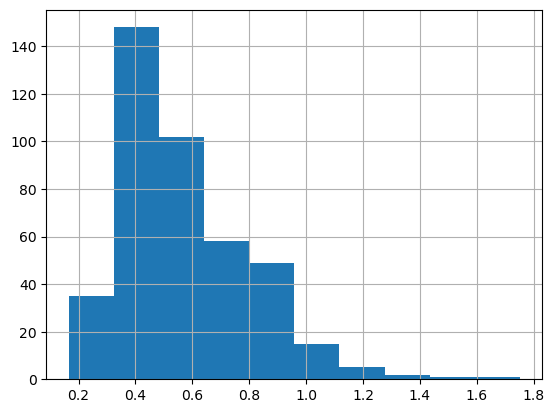

In [467]:
NP_means.Nit.hist()

<Axes: >

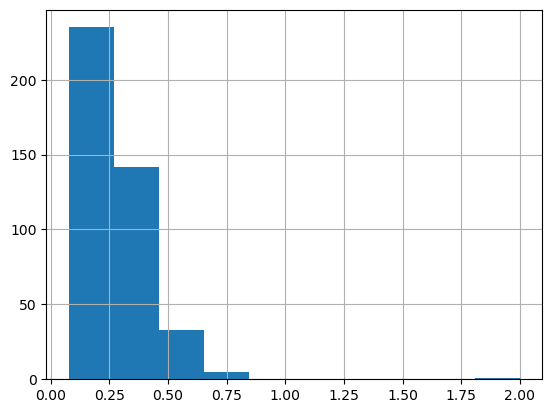

In [468]:
NP_means.Phos.hist()

In [172]:
Nitdecomp=pd.DataFrame(data=NP_means.Nit,index=NP_means.date_format)

In [174]:
Nitdecomp.Nit=NP_means.Nit

In [175]:
NP_means.Phos

0      0.525385
1      0.534000
2      0.469091
3      0.529375
4      0.649000
         ...   
411    0.129429
412    0.111750
413    0.112889
414    0.124333
415    0.342667
Name: Phos, Length: 416, dtype: float64

In [176]:
decomp_N=pd.DataFrame(data=NP_means.Nit,index=NP_means.date_format)
decomp_P=pd.DataFrame(data=NP_means.Phos,index=NP_means.date_format)
decomp_N.index.name=''
decomp_P.index.name=''

In [178]:
decomp_N=NP_means.Nit.to_frame()
decomp_P=NP_means.Phos.to_frame()

In [179]:
decomp_P.index=NP_means.date_format
decomp_P.index.name=''
decomp_P

Phos
                    
1990-01-01  0.525385
1990-02-01  0.534000
1990-03-01  0.469091
1990-04-01  0.529375
1990-05-01  0.649000
...              ...
2024-04-01  0.129429
2024-05-01  0.111750
2024-06-01  0.112889
2024-07-01  0.124333
2024-08-01  0.342667

[416 rows x 1 columns]

In [182]:
decomp_N.index=NP_means.date_format
decomp_N.index.name=''
decomp_N

Nit
                    
1990-01-01  0.682750
1990-02-01  0.847750
1990-03-01  0.641500
1990-04-01  0.630976
1990-05-01  0.676829
...              ...
2024-04-01  0.442958
2024-05-01  0.330565
2024-06-01  0.355957
2024-07-01  0.182000
2024-08-01  0.189706

[416 rows x 1 columns]

In [183]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [184]:
decomposition_N=seasonal_decompose(decomp_N,model='multiplicative')
decomposition_P=seasonal_decompose(decomp_P,model='multiplicative')


In [185]:
decomp_P['seasonal']=decomposition_P.seasonal
decomp_P['trend']=decomposition_P.trend
decomp_P['residual']=decomposition_P.resid

In [186]:
decomp_N['seasonal']=decomposition_N.seasonal
decomp_N['trend']=decomposition_N.trend
decomp_N['residual']=decomposition_N.resid

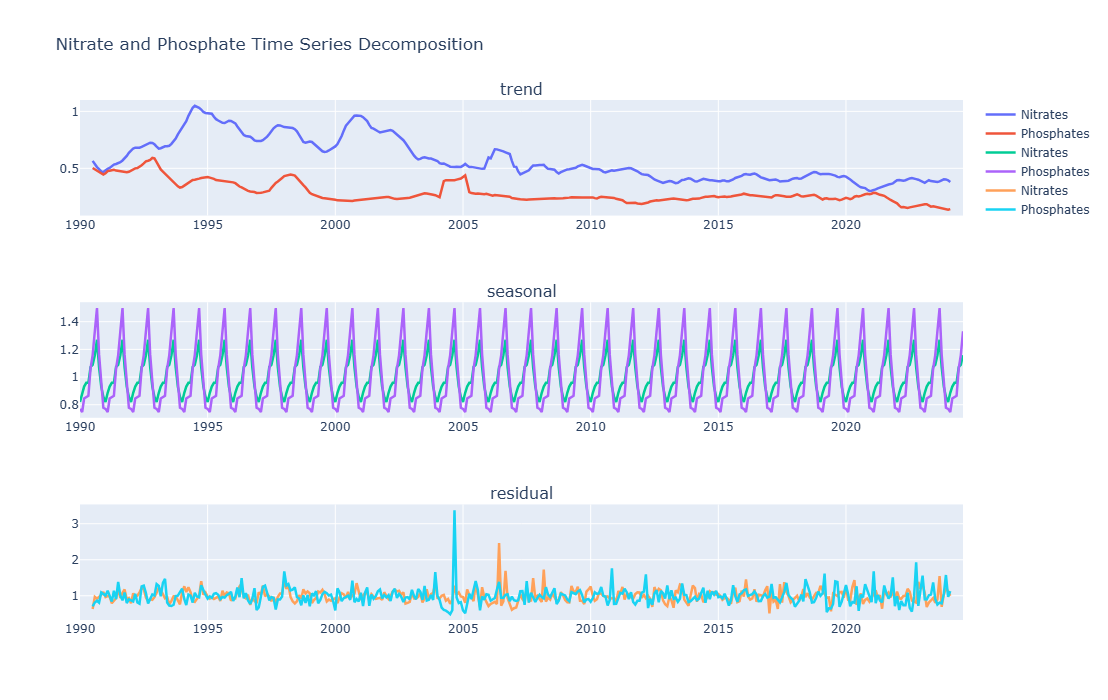

In [557]:
cols = ["trend", "seasonal", "residual"]

fig = make_subplots(rows=3, cols=1, subplot_titles=cols)

for i, col in enumerate(cols):
    fig.add_trace(
        go.Scatter(x=decomp_N.index, y=decomp_N[col],name='Nitrates'),
        row=i+1,
        col=1
    )
    fig.add_trace(
        go.Scatter(x=decomp_P.index, y=decomp_P[col],name='Phosphates'),
        row=i+1,
        col=1
    )

fig.update_layout(
    height=700,
    width=1000,
    showlegend=True,
    title=dict(text="Nitrate and Phosphate Time Series Decomposition"),
    font=dict(size=12),
#    yref='paper'
)

fig.update_traces(
    line=dict(dash="solid", width=2.5), line_shape='linear'
    )

#fig.suptitle()
fig.show()

In [189]:
NP_nekton

Nit      Phos   shannon
ym                                   
1999_1   0.642960  0.155000  0.489115
1999_2   0.516667  0.217500  0.859081
1999_3   0.589455  0.227500  0.825866
1999_4   0.621739  0.248571  0.783379
1999_5   0.725000  0.171818  0.894913
...           ...       ...       ...
2022_8   0.413314  0.121000  0.985419
2022_9   0.440909  0.241167  1.037126
2022_10  0.349529  0.376714  0.909193
2022_11  0.515480  0.114714  0.818095
2022_12  0.402571  0.157556  1.055173

[144 rows x 3 columns]

In [191]:
benX_match_nekton

Year  month AreaAbbr  ShannonDiversity     Temp-T     Temp-B      ym  \
73   1999      8       AR          0.466296  29.028519  29.180000  1999-8   
74   1999      8       HR          0.569000  28.804500  29.049500  1999-8   
75   1999      8       PR          0.201000  30.941000  30.619500  1999-8   
76   1999      8      TCB          0.517500  31.500000  31.250000  1999-8   
77   1999      9       AR          0.486154  29.002308  29.672308  1999-9   
..    ...    ...      ...               ...        ...        ...     ...   
392  2022      8      LTB          0.519500  30.422000  30.467500  2022-8   
393  2022      8      MTB          0.542500  30.166250  30.077500  2022-8   
394  2022      8      OTB          0.510000  30.475714  30.305714  2022-8   
395  2022      9       MR          0.618750  29.317500  28.842500  2022-9   
396  2022      9      TCB          0.650000  29.030000  29.220000  2022-9   

     year_seq year_seq_month  
73          1            1_8  
74          1            1_8  
75          1            1_8  
76          1            1_8  
77          1            1_9  
..        ...            ...  
392        12           12_8  
393        12           12_8  
394        12           12_8  
395        12           12_9  
396        12           12_9  

[167 rows x 9 columns]

NameError: name 'nit' is not defined

In [478]:
NP_match

year  month       ym       Nit      Phos  ActivityDepth   Latitude  \
0    1999      1   1999_1  0.642960  0.155000       1.430417  27.818557   
1    1999      2   1999_2  0.516667  0.217500       0.971111  27.812085   
2    1999      3   1999_3  0.589455  0.227500       0.881905  27.803355   
3    1999      4   1999_4  0.621739  0.248571       1.461739  27.823980   
4    1999      5   1999_5  0.725000  0.171818       1.437778  27.816501   
5    1999      6   1999_6  0.775476  0.230769       1.260000  27.825173   
6    1999      7   1999_7  0.823913  0.290000       1.816522  27.819636   
7    1999      8   1999_8  0.778421  0.348889       1.303158  27.831165   
8    1999      9   1999_9  0.689318  0.377692       2.067727  27.792488   
9    1999     10  1999_10  0.629000  0.269333       2.298864  27.792711   
10   1999     11  1999_11  0.533721  0.216667       2.196279  27.790237   
11   1999     12  1999_12  0.528711  0.150000       2.180000  27.792711   
12   2001      1   2001_1  0.696170  0.184286       1.690968  27.801174   
13   2001      2   2001_2  0.851304  0.119231       1.913793  27.799963   
14   2001      3   2001_3  0.935085  0.205294       2.058621  27.793102   
15   2001      4   2001_4  0.956279  0.240000       1.915385  27.797305   
16   2001      5   2001_5  0.737348  0.145833       1.863103  27.783367   
17   2001      6   2001_6  0.960000  0.260909       2.031379  27.795577   
18   2001      7   2001_7  0.915814  0.254286       2.228846  27.790665   
19   2001      8   2001_8  0.891136  0.318000       2.142593  27.797048   
20   2001      9   2001_9  0.972545  0.412500       2.193077  27.788597   
21   2001     10  2001_10  0.823182  0.330769       2.105185  27.797048   
22   2001     11  2001_11  0.673023  0.211333       2.186538  27.791588   
23   2001     12  2001_12  0.780000  0.197059       2.068182  27.804187   
24   2004      1   2004_1  0.433627  0.196000       1.979600  27.795525   
25   2004      2   2004_2  0.447096  0.162500       2.007255  27.796916   
26   2004      3   2004_3  0.503744  0.178333       2.373810  27.801644   
27   2004      4   2004_4  0.532471  0.200000       2.071000  27.793067   
28   2004      5   2004_5  0.444231  0.200714       2.084314  27.796875   
29   2004      6   2004_6  0.511808  0.228182       2.087843  27.795131   
30   2004      7   2004_7  0.434367  0.221429       2.368182  27.796920   
31   2004      8   2004_8  0.529404  0.314615       2.082549  27.797937   
32   2004      9   2004_9  0.827765  2.000000       2.150392  27.794913   
33   2004     10  2004_10  0.563404  0.442500       2.120980  27.797107   
34   2004     11  2004_11  0.520269  0.300000       2.127451  27.792475   
35   2004     12  2004_12  0.430905  0.262000       2.343902  27.797523   
36   2006      1   2006_1  0.348021  0.214000       3.427917  27.797250   
37   2006      2   2006_2  0.403019  0.167286       3.321698  27.794550   
38   2006      3   2006_3  0.472683  0.197429       2.480488  27.778105   
39   2006      4   2006_4  0.532489  0.213250       3.908667  27.797524   
40   2006      5   2006_5  0.491356  0.268813       3.029778  27.801318   
41   2006      6   2006_6  1.751000  0.385583       1.950000  27.801030   
42   2006      7   2006_7  0.518816  0.281900       1.478684  27.799327   
43   2006      8   2006_8  0.634897  0.318909       1.365897  27.814344   
44   2006      9   2006_9  1.373824  0.389667       1.379118  27.797557   
45   2006     10  2006_10  0.629730  0.305462       1.365946  27.785341   
46   2006     11  2006_11  0.446571  0.197077       1.814286  27.783632   
47   2006     12  2006_12  0.295867  0.182214       1.673667  27.789125   
48   2008      1   2008_1  0.395355  0.183182       1.482581  27.788067   
49   2008      2   2008_2  0.389000  0.168455       1.760714  27.793156   
50   2008      3   2008_3  0.852250  0.184700       1.473125  27.787298   
51   2008      4   2008_4  0.410795  0.244200       1.306364  27.786074   
52   2008      5   2008_5  0.4

In [ ]:
SDI_means_2

In [506]:
SDI_means_2['day']='01'

SyntaxError: invalid syntax (4030355018.py, line 1)

In [509]:
NP_match['day']='01'

C:\Users\Ajax\AppData\Local\Temp\ipykernel_45136\1831465455.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [510]:
NP_match

year  month       ym       Nit      Phos  ActivityDepth   Latitude  \
0    1999      1   1999_1  0.642960  0.155000       1.430417  27.818557   
1    1999      2   1999_2  0.516667  0.217500       0.971111  27.812085   
2    1999      3   1999_3  0.589455  0.227500       0.881905  27.803355   
3    1999      4   1999_4  0.621739  0.248571       1.461739  27.823980   
4    1999      5   1999_5  0.725000  0.171818       1.437778  27.816501   
5    1999      6   1999_6  0.775476  0.230769       1.260000  27.825173   
6    1999      7   1999_7  0.823913  0.290000       1.816522  27.819636   
7    1999      8   1999_8  0.778421  0.348889       1.303158  27.831165   
8    1999      9   1999_9  0.689318  0.377692       2.067727  27.792488   
9    1999     10  1999_10  0.629000  0.269333       2.298864  27.792711   
10   1999     11  1999_11  0.533721  0.216667       2.196279  27.790237   
11   1999     12  1999_12  0.528711  0.150000       2.180000  27.792711   
12   2001      1   2001_1  0.696170  0.184286       1.690968  27.801174   
13   2001      2   2001_2  0.851304  0.119231       1.913793  27.799963   
14   2001      3   2001_3  0.935085  0.205294       2.058621  27.793102   
15   2001      4   2001_4  0.956279  0.240000       1.915385  27.797305   
16   2001      5   2001_5  0.737348  0.145833       1.863103  27.783367   
17   2001      6   2001_6  0.960000  0.260909       2.031379  27.795577   
18   2001      7   2001_7  0.915814  0.254286       2.228846  27.790665   
19   2001      8   2001_8  0.891136  0.318000       2.142593  27.797048   
20   2001      9   2001_9  0.972545  0.412500       2.193077  27.788597   
21   2001     10  2001_10  0.823182  0.330769       2.105185  27.797048   
22   2001     11  2001_11  0.673023  0.211333       2.186538  27.791588   
23   2001     12  2001_12  0.780000  0.197059       2.068182  27.804187   
24   2004      1   2004_1  0.433627  0.196000       1.979600  27.795525   
25   2004      2   2004_2  0.447096  0.162500       2.007255  27.796916   
26   2004      3   2004_3  0.503744  0.178333       2.373810  27.801644   
27   2004      4   2004_4  0.532471  0.200000       2.071000  27.793067   
28   2004      5   2004_5  0.444231  0.200714       2.084314  27.796875   
29   2004      6   2004_6  0.511808  0.228182       2.087843  27.795131   
30   2004      7   2004_7  0.434367  0.221429       2.368182  27.796920   
31   2004      8   2004_8  0.529404  0.314615       2.082549  27.797937   
32   2004      9   2004_9  0.827765  2.000000       2.150392  27.794913   
33   2004     10  2004_10  0.563404  0.442500       2.120980  27.797107   
34   2004     11  2004_11  0.520269  0.300000       2.127451  27.792475   
35   2004     12  2004_12  0.430905  0.262000       2.343902  27.797523   
36   2006      1   2006_1  0.348021  0.214000       3.427917  27.797250   
37   2006      2   2006_2  0.403019  0.167286       3.321698  27.794550   
38   2006      3   2006_3  0.472683  0.197429       2.480488  27.778105   
39   2006      4   2006_4  0.532489  0.213250       3.908667  27.797524   
40   2006      5   2006_5  0.491356  0.268813       3.029778  27.801318   
41   2006      6   2006_6  1.751000  0.385583       1.950000  27.801030   
42   2006      7   2006_7  0.518816  0.281900       1.478684  27.799327   
43   2006      8   2006_8  0.634897  0.318909       1.365897  27.814344   
44   2006      9   2006_9  1.373824  0.389667       1.379118  27.797557   
45   2006     10  2006_10  0.629730  0.305462       1.365946  27.785341   
46   2006     11  2006_11  0.446571  0.197077       1.814286  27.783632   
47   2006     12  2006_12  0.295867  0.182214       1.673667  27.789125   
48   2008      1   2008_1  0.395355  0.183182       1.482581  27.788067   
49   2008      2   2008_2  0.389000  0.168455       1.760714  27.793156   
50   2008      3   2008_3  0.852250  0.184700       1.473125  27.787298   
51   2008      4   2008_4  0.410795  0.244200       1.306364  27.786074   
52   2008      5   2008_5  0.4

In [505]:
NP_match['date_format']=pd.to_datetime(NP_match.day.astype(str)+'-'+NP_match.month.astype(str)+'-'+NP_match.year.astype(str))

AttributeError: 'DataFrame' object has no attribute 'day'

In [501]:
SDI_means_2['date_format'] = pd.to_datetime(SDI_means_2.day.astype(str)+'-'+SDI_means_2.month.astype(str)+'-'+SDI_means_2.sgyear.astype(str))

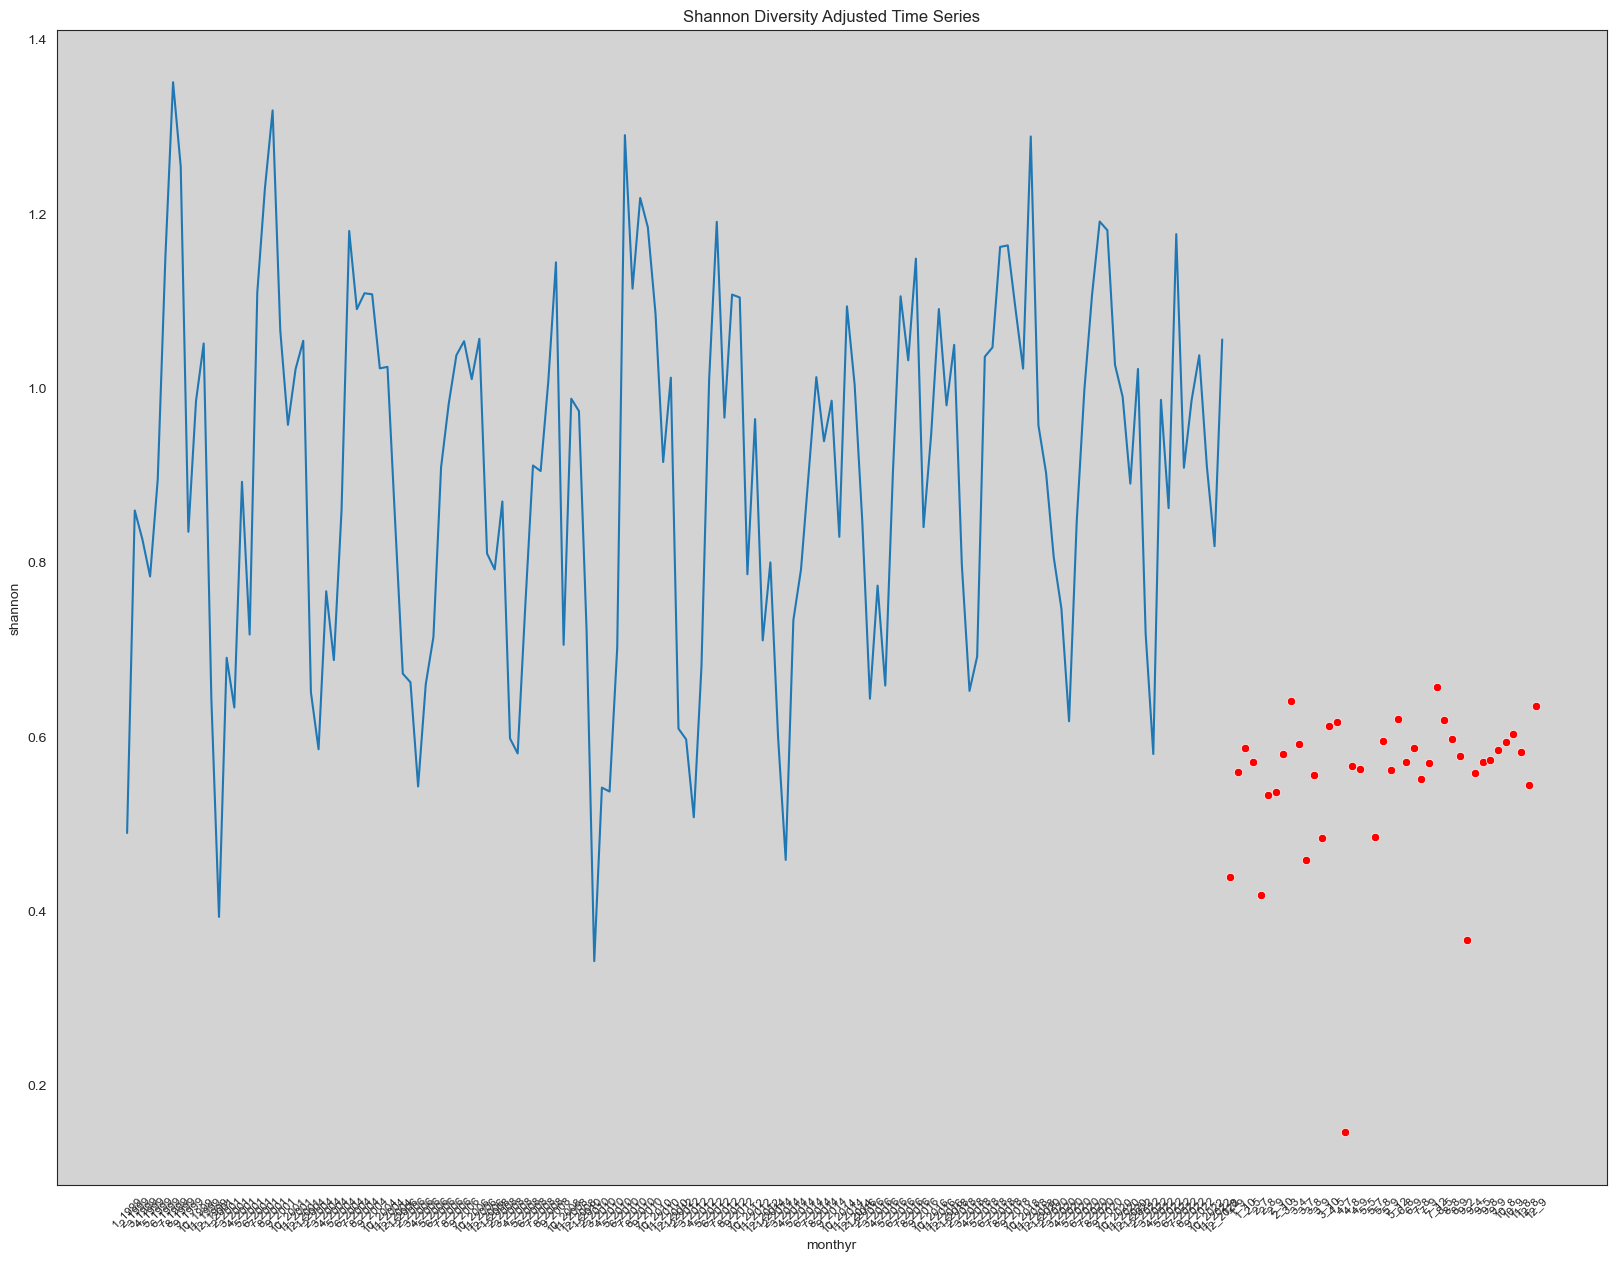

In [598]:
#plt.figure()
#sns.lineplot(x='monthyr',y='shannon',data=SDI_means_2,palette='viridis')
fig,ax=plt.subplots(figsize=(20,15))
plt.subplot()
sns.lineplot(x='monthyr',y='shannon',data=SDI_means_2,ax=ax)
plt.subplot()
sns.scatterplot(x='year_seq_month',y='ShannonDiversity', data=benX_AreaMean,color='red')
#plt.legend()
plt.xticks(rotation=45,fontsize='small')
plt.title('Shannon Diversity Adjusted Time Series')
plt.show()

In [474]:
benX_sindex['yrmon']=benX_sindex.month.astype(str)+'_'+benX_sindex.Year.astype(str)

<Axes: title={'center': 'Benthic SDI Adjusted for Sampling Schedule'}, xlabel='ym'>

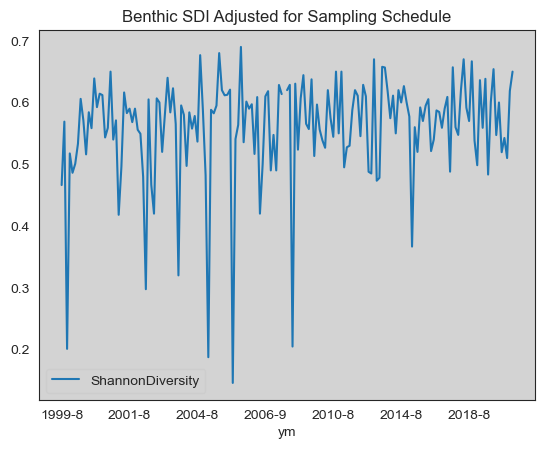

In [600]:
benX_sindex[benX_sindex.Year.isin(years)].plot(x='ym',y='ShannonDiversity',title='Benthic SDI Adjusted for Sampling Schedule')

In [478]:
benX_sindex['year_seq']=benX_sindex.Year.map({
    1999:1,
    2001:2,
    2004:3,
    2006:4,
    2008:5,
    2010:6,
    2012:7,
    2014:8,
    2016:9,
    2018:10,
    2020:11,
    2022:12
    })

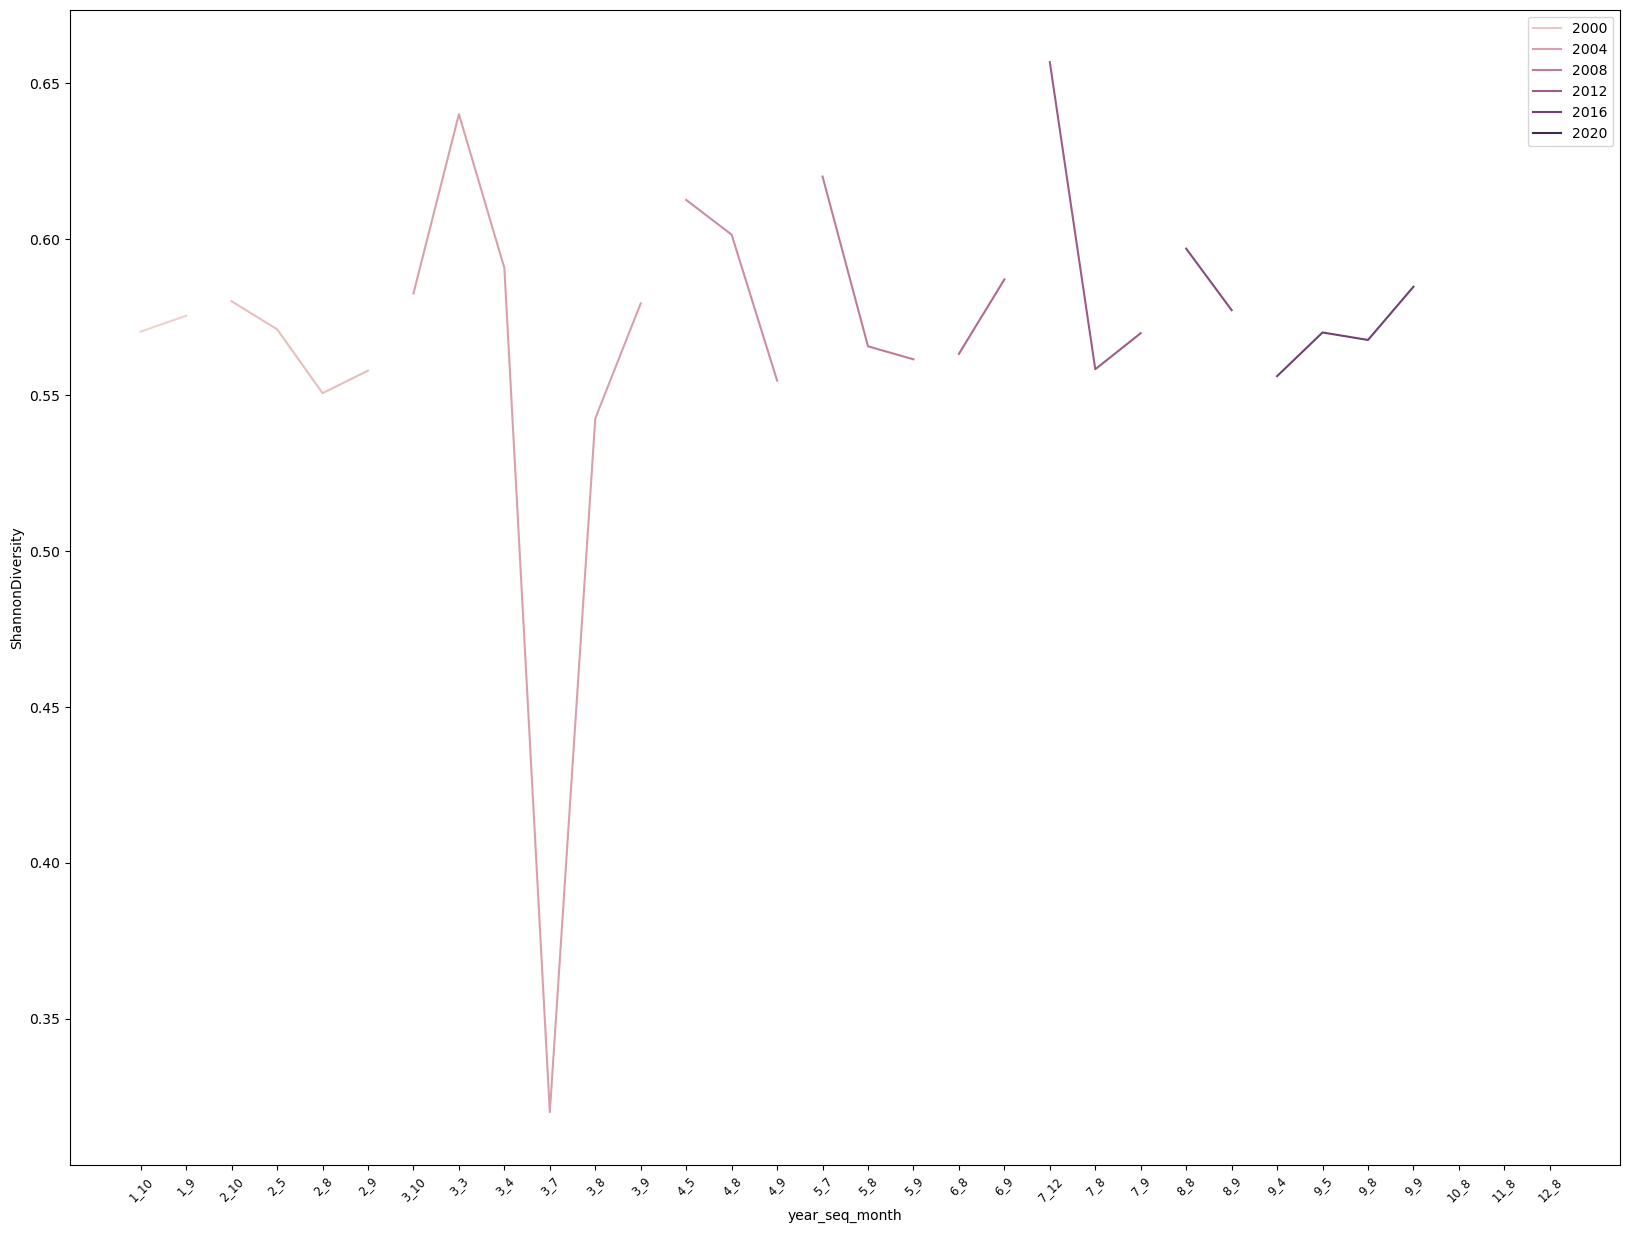

In [520]:
plt.figure(figsize=(20,15))
sns.lineplot(x='year_seq_month',y='ShannonDiversity', data=benX_AreaMean , hue='Year')
plt.legend()
plt.xticks(rotation=45,fontsize='small')
plt.show()

In [ ]:
plt.figure(figsize=(20,15))
sns.lineplot(x='year_seq',y='shannon',data=SDI_means_2,palette='viridis')
plt.legend()1
plt.xticks(rotation=45,fontsize='small')
plt.show()

In [547]:
benX_AreaMean

Year year_seq_month  ShannonDiversity
0   1999           1_10          0.570296
1   1999            1_9          0.575365
2   2001           2_10          0.580000
3   2001            2_5          0.571034
4   2001            2_8          0.550540
5   2001            2_9          0.557778
6   2004           3_10          0.582500
7   2004            3_3          0.640000
8   2004            3_4          0.590667
9   2004            3_7          0.320000
10  2004            3_8          0.542420
11  2004            3_9          0.579333
12  2006            4_5          0.612500
13  2006            4_8          0.601354
14  2006            4_9          0.554583
15  2008            5_7          0.620000
16  2008            5_8          0.565556
17  2008            5_9          0.561396
18  2010            6_8          0.563148
19  2010            6_9          0.587000
20  2012           7_12          0.656667
21  2012            7_8          0.558214
22  2012            7_9          0.569778
23  2014            8_8          0.596895
24  2014            8_9          0.577143
25  2016            9_4          0.556000
26  2016            9_5          0.570000
27  2016            9_8          0.567599
28  2016            9_9          0.584667
29  2018           10_8          0.582292
30  2020           11_8          0.569814
31  2022           12_8          0.543000

In [524]:
shared_months=benX_match_nekton['year_seq_month']

In [549]:
SDI_means_2

month  sgyear   shannon monthyr
0        1       1  0.489115     1_1
12       2       1  0.859081     2_1
24       3       1  0.825866     3_1
36       4       1  0.783379     4_1
48       5       1  0.894913     5_1
..     ...     ...       ...     ...
95       8      12  0.985419    8_12
107      9      12  1.037126    9_12
119     10      12  0.909193   10_12
131     11      12  0.818095   11_12
143     12      12  1.055173   12_12

[144 rows x 4 columns]

In [545]:
benX_AreaMean[benX_AreaMean.year_seq_month.isin(shared_months)].shape

(32, 3)

In [552]:
test=SDI_means_2.merge(benX_AreaMean[benX_AreaMean.year_seq_month.isin(shared_months)], left_on='monthyr', right_on='year_seq_month')

<Axes: xlabel='year_seq_month'>

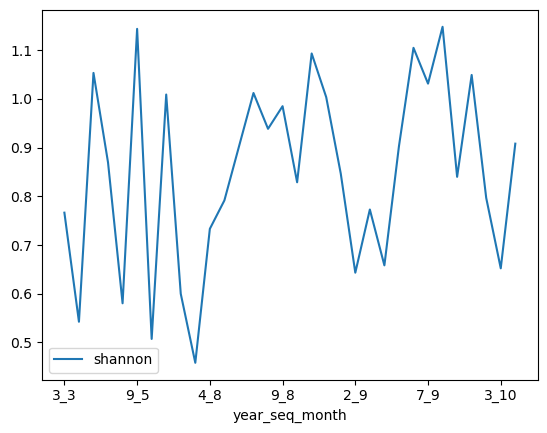

In [555]:
test.plot(x='year_seq_month',y='shannon')

C:\Users\Ajax\AppData\Local\Temp\ipykernel_34704\193213966.py:3: UserWarning:

Ignoring `palette` because no `hue` variable has been assigned.



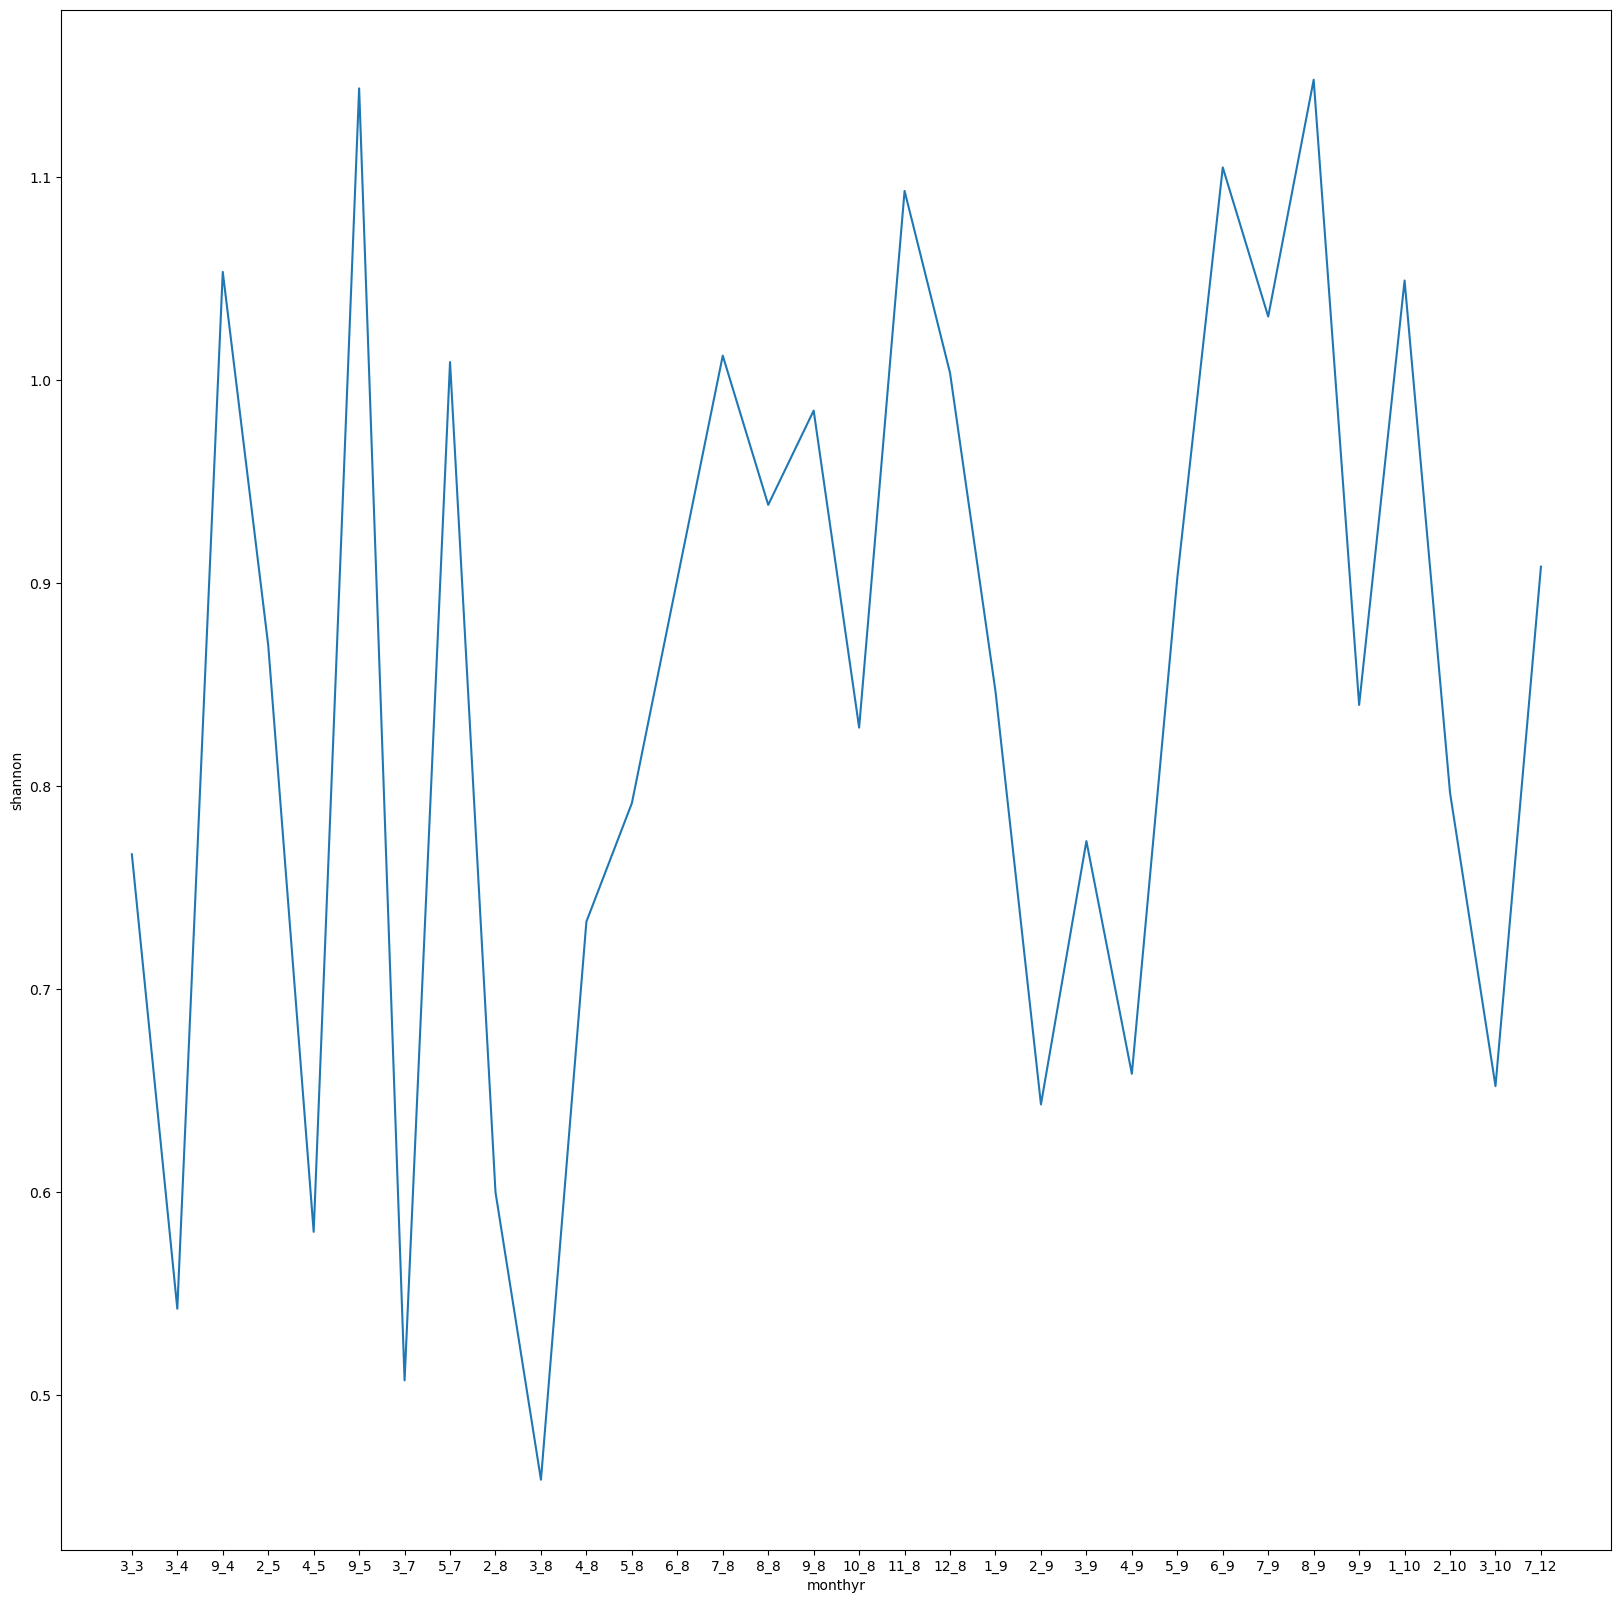

In [565]:
plt.figure(figsize=(20,20))
sns.lineplot(x='year_seq_month',y='ShannonDiversity', data=test,ax=ax)
sns.lineplot(x='monthyr',y='shannon',data=test,palette='viridis')
plt.show()

# Benthic with missing values

In [ ]:
# NP_means

In [193]:
os.chdir('J:\\Brainstation\\Capstone Git\\data\\PossibleDataSources\\Benthic Index\\OG_Results')

In [219]:
benthic_base=pd.read_csv('Benthic_BioDataSpreadsheet_ActualValuesCommunityStats2.csv',encoding='cp1252', low_memory=False)

In [220]:
benthic_base.head(4)

ProgramAbbrev         ProgramName  \
0       Benthic  Benthic Monitoring   
1       Benthic  Benthic Monitoring   
2       Benthic  Benthic Monitoring   
3       Benthic  Benthic Monitoring   

                                      FundingProject AreaAbbr  \
0  TBEP                                          ...       HB   
1  TBEP                                          ...       HB   
2  TBEP                                          ...       HB   
3  TBEP                                          ...       HB   

           AreaName Hexagon  Year     SampleTime  StationID StationNumber  \
0  Hillsborough Bay    HB34  1993  9/14/93 11:33       2452        93HB03   
1  Hillsborough Bay    HB26  1993  9/13/93 12:37       2453        93HB04   
2  Hillsborough Bay    HB25  1993   9/9/93 12:17       2454        93HB05   
3  Hillsborough Bay    HB25  1993   9/9/93 13:37       2455        93HB06   

    Latitude  Longitude                                           Comments  \
0  27.874001 -82.418999  3RD GRAB DESC: MUD, RPD = 0, SAV = N, TIME OF ...   
1  27.875000 -82.468002  3RD GRAB DESC: MUDDY OOZE, RPD = 0, SAV = N, T...   
2  27.867001 -82.485001  3RD GRAB DESC: SAND, RPD = >95, SAV = N, TIME ...   
3  27.858000 -82.474999  3RD GRAB DESC: MUDDY SAND, RPD = 100, SAV = N,...   

   Temp-T  TempQ-T  Temp-B  TempQ-B  DO-T DOQ-T  DO-B DOQ-B   DO-BCat  DOp-T  \
0   29.31      NaN   29.30      NaN  6.39   NaN  5.42   NaN  Normoxic   95.0   
1   29.89      NaN   29.36      NaN  7.85   NaN  5.31   NaN  Normoxic  116.6   
2   29.80      NaN   29.81      NaN  6.90   NaN  6.88   NaN  Normoxic  104.1   
3   29.95      NaN   29.44      NaN  5.32   NaN  4.20   NaN  Normoxic   80.4   

  DOpQ-T  DOp-B DOpQ-B  Cond-T CondQ-T  Cond-B CondQ-B  pH-T pHQ-T  pH-B  \
0      C   80.7      C     NaN     NaN     NaN     NaN  7.88   NaN  7.85   
1      C   78.5      C     NaN     NaN     NaN     NaN  8.03   NaN  7.92   
2      C  103.8      C     NaN     NaN     NaN     NaN  8.03   NaN  8.04   
3      C   63.1      C     NaN     NaN     NaN     NaN  7.97   NaN  7.92   

  pHQ-B  Sal-T  SalQ-T  Sal-B  SalQ-B Salinity-BCat  Transmitter ID Number  \
0   NaN   23.4     NaN   23.7     NaN    Polyhaline                    NaN   
1   NaN   21.4     NaN   22.2     NaN    Polyhaline                    NaN   
2   NaN   24.5     NaN   24.4     NaN    Polyhaline                    NaN   
3   NaN   24.3     NaN   24.8     NaN    Polyhaline                    NaN   

   Display ID Number  Depth-T DepthQ-T  Depth-B DepthQ-B        Depth-BCat  \
0                NaN      0.1      NaN     3.00      NaN     Deep Subtidal   
1                NaN      0.1      NaN     3.60      NaN     Deep Subtidal   
2                NaN      0.1      NaN     0.75      NaN  Shallow Subtidal   
3                NaN      0.1      NaN     2.80      NaN     Deep Subtidal   

   SiltClayPercent SiltClay_Q SiltClayCat OrganicsCollected  A_BHC A_BHC_Q  \
0              NaN          O         NaN                No    NaN     NaN   
1             20.7        NaN   Very Fine                No    NaN     NaN   
2              2.1        NaN      Medium                No    NaN     NaN   
3              4.5        NaN      Medium                No    NaN     NaN   

  B_BHC B_BHC_Q  D_BHC D_BHC_Q  G_BHC G_BHC_Q  Aldrin Aldrin_Q  Dieldrin  \
0   NaN     NaN    NaN     NaN    NaN     NaN     NaN      NaN       NaN   
1   NaN     NaN    NaN     NaN    NaN     NaN     NaN      NaN       NaN   
2   NaN     NaN    NaN     NaN    NaN     NaN     NaN      NaN       NaN   
3   NaN     NaN    NaN     NaN    NaN     NaN     NaN      NaN       NaN   

  Dieldrin_Q  Endrin Endrin_Q  Endosulfan_I Endosulfan_I_Q  Endosulfan_II  \
0        NaN     NaN      NaN           NaN            NaN            NaN   
1        NaN     NaN      NaN           NaN            NaN            NaN   
2        NaN     NaN      NaN           NaN            NaN            NaN   
3        NaN     NaN      NaN           NaN            NaN 

In [221]:
benthic_base['month']=pd.to_datetime(benthic_base.SampleTime,format='mixed').dt.month

In [ ]:
# Determining which columns to keep
# 3,4,6,227,6,10,11,217,219,220,221
counter=0
for x in benthic_base.columns:
    print(f'[{counter}]: {x}')
    counter+=1

In [224]:
benthic=benthic_base.iloc[:,[3,4,6,227,10,11,217,219,220,221]]

In [227]:
benthic['date_format']=pd.to_datetime(benthic.Year.astype(str)+'-'+benthic.month.astype(str)+'-01')

C:\Users\Ajax\AppData\Local\Temp\ipykernel_45136\1132599771.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [228]:
benthic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4787 entries, 0 to 4786
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   AreaAbbr           4787 non-null   object        
 1   AreaName           4787 non-null   object        
 2   Year               4787 non-null   int64         
 3   month              4787 non-null   int32         
 4   Latitude           4787 non-null   float64       
 5   Longitude          4787 non-null   float64       
 6   TBBI               4568 non-null   float64       
 7   SpeciesRichness    4568 non-null   float64       
 8   AdjCountAbundance  4568 non-null   float64       
 9   ShannonDiversity   4568 non-null   float64       
 10  date_format        4787 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(6), int32(1), int64(1), object(2)
memory usage: 392.8+ KB


In [229]:
benthic.head(5)

AreaAbbr          AreaName  Year  month   Latitude  Longitude   TBBI  \
0       HB  Hillsborough Bay  1993      9  27.874001 -82.418999  68.84   
1       HB  Hillsborough Bay  1993      9  27.875000 -82.468002  57.33   
2       HB  Hillsborough Bay  1993      9  27.867001 -82.485001  66.98   
3       HB  Hillsborough Bay  1993      9  27.858000 -82.474999  15.18   
4       HB  Hillsborough Bay  1993      9  27.850201 -82.454002  63.30   

   SpeciesRichness  AdjCountAbundance  ShannonDiversity date_format  
0              8.0              275.0              0.66  1993-09-01  
1              9.0             8175.0              0.29  1993-09-01  
2             53.0            19425.0              0.62  1993-09-01  
3             56.0            24225.0              0.65  1993-09-01  
4             12.0              350.0              0.56  1993-09-01

In [242]:
# Get subset for Hillsborough and Middle Tampa Bay
benthic_MTBHB=benthic[benthic.AreaAbbr.isin(['MTB','HB'])]

In [246]:
benthic_mean=benthic_MTBHB.groupby('date_format')[['SpeciesRichness','AdjCountAbundance','ShannonDiversity']].mean()

In [249]:
benthic_mean.index.name=''

In [252]:
benthic_mean.rename(columns={
    'SpeciesRichness':'benthic_SpeciesRichness',
    'AdjCountAbundance':'benthic_AdjCountAbundance',
    'ShannonDiversity':'benthic_shannon'
},inplace=True)

In [255]:
benthic_mean.shape

(59, 3)

In [258]:
benthic_mean.sort_index(inplace=True)

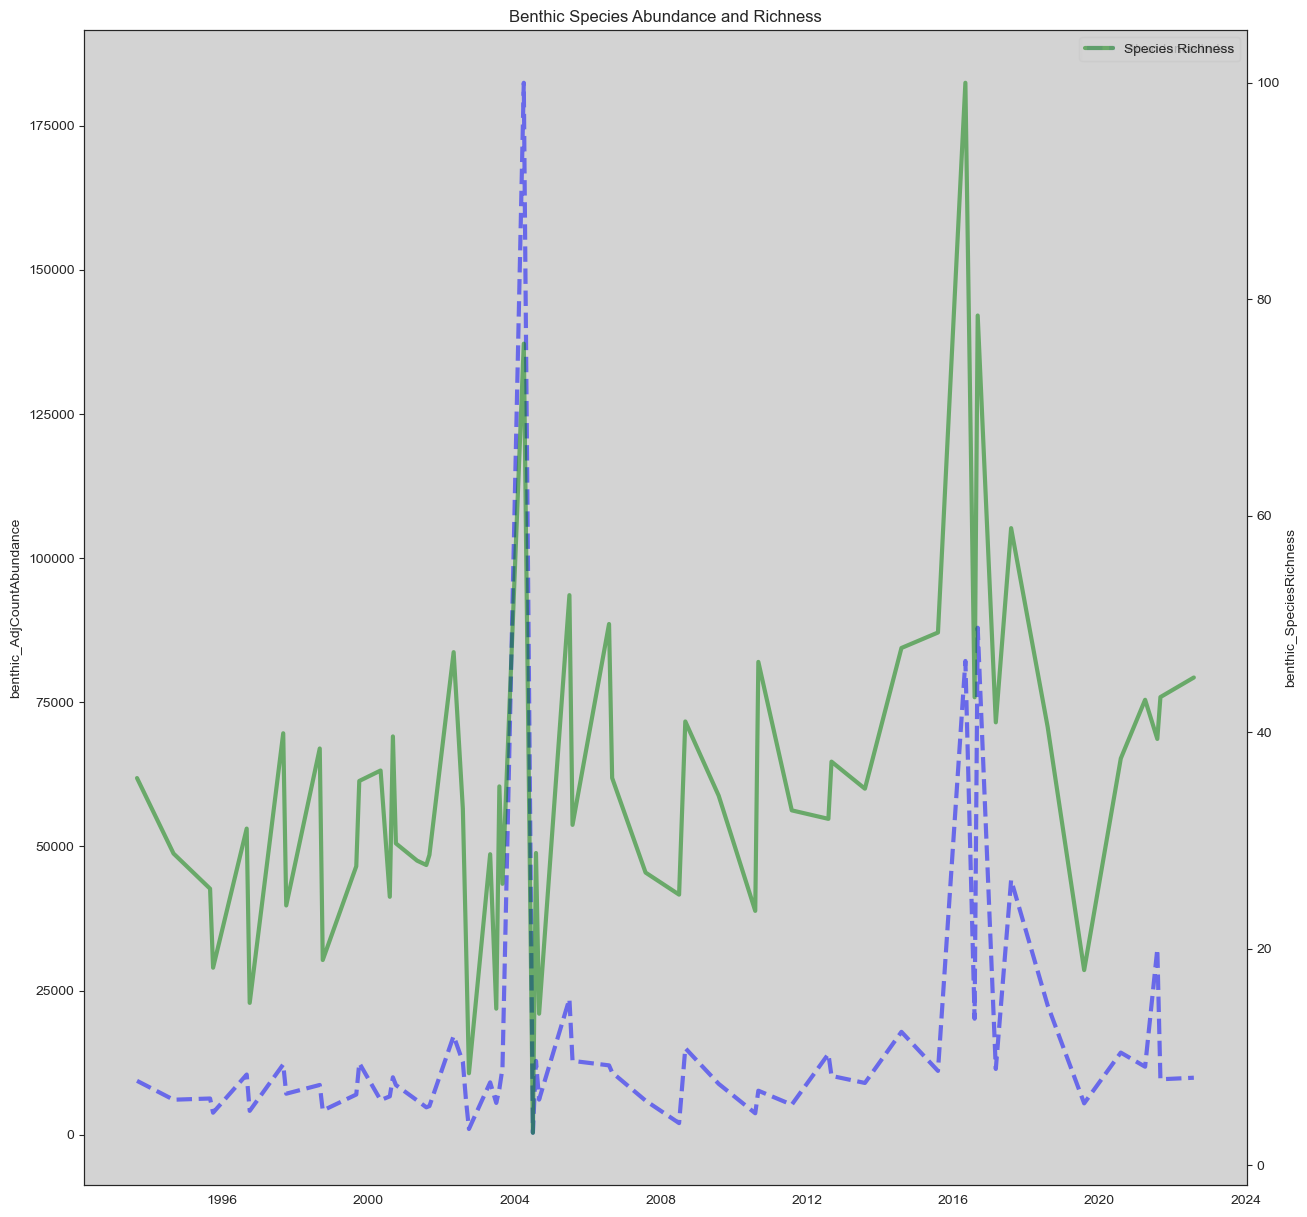

In [591]:
fig,ax= plt.subplots(figsize=(15,15))
plt.gca()
sns.lineplot(data=benthic_mean,x=benthic_mean.index,y='benthic_AdjCountAbundance',label='Abundance Index',ax=ax,color='blue',alpha=0.5,linestyle='--',linewidth=3)
plt.legend()
plt.gca()
ax1=ax.twinx()
sns.lineplot(data=benthic_mean,x=benthic_mean.index,y='benthic_SpeciesRichness',label='Species Richness',ax=ax1,color='green',alpha=0.5,linewidth=3)
plt.title('Benthic Species Abundance and Richness')
plt.xlabel('Year',fontsize='x-large')
plt.legend()
plt.show()

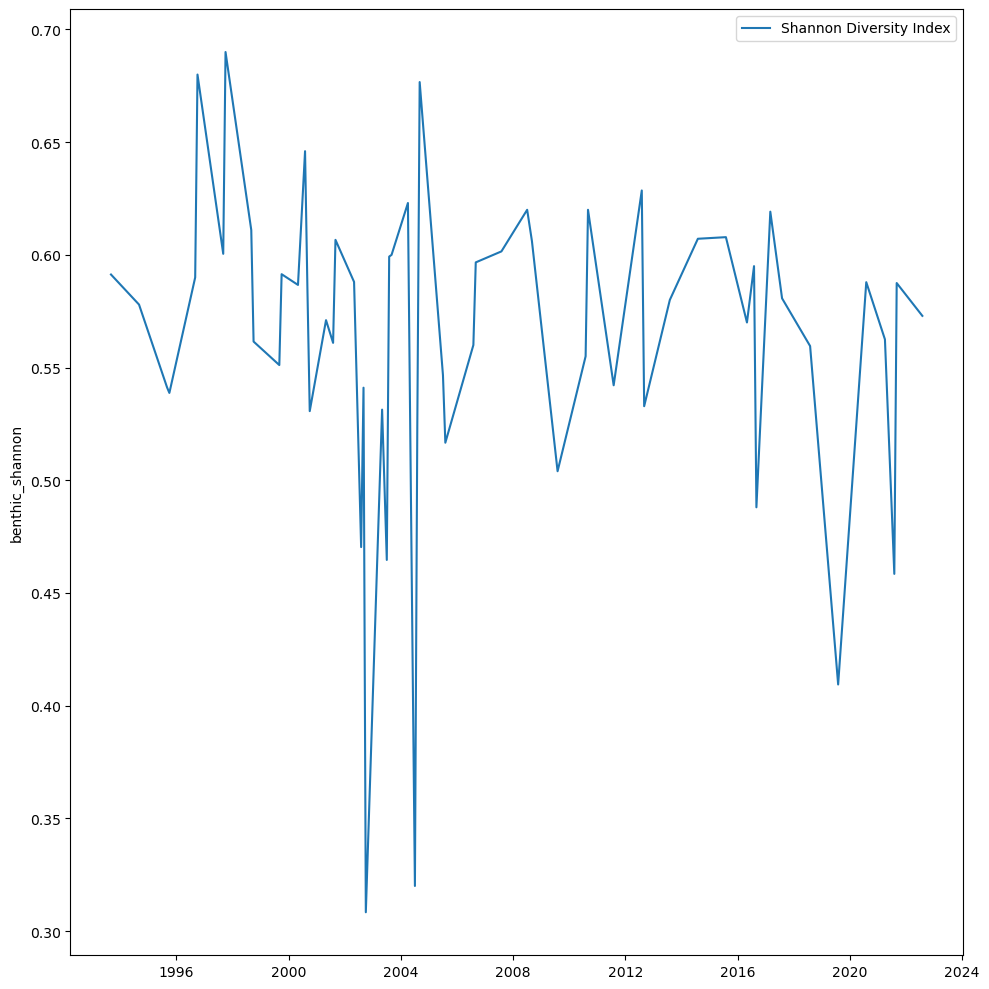

In [269]:
plt.figure(figsize=(10,10))
sns.lineplot(data=benthic_mean,x=benthic_mean.index,y='benthic_shannon',label='Shannon Diversity Index')
#sns.lineplot(data=benthic_mean,x=benthic_mean.index,y='benthic_AdjCountAbundance',label='Abundance Index')
#sns.lineplot(data=benthic_mean,x=benthic_mean.index,y='benthic_SpeciesRichness',label='Species Richness')
plt.tight_layout()

In [290]:
benthic_mean

benthic_SpeciesRichness  benthic_AdjCountAbundance  \
                                                                 
1993-09-01                35.769231                9358.512821   
1994-09-01                28.794872                6082.307692   
1995-09-01                25.547619                6291.785714   
1995-10-01                18.250000                3831.250000   
1996-09-01                31.100000               10447.080000   
1996-10-01                15.000000                4150.000000   
1997-09-01                39.906977               12207.604651   
1997-10-01                24.000000                7125.000000   
1998-09-01                38.500000                8643.000000   
1998-10-01                18.961538                4202.884615   
1999-09-01                27.622222                6981.777778   
1999-10-01                35.500000               12441.142857   
2000-05-01                36.466667                6011.666667   
2000-08-01                24.800000                6665.000000   
2000-09-01                39.615385                9973.743590   
2000-10-01                29.733333                8628.366667   
2001-05-01                28.137931                5958.620690   
2001-08-01                27.736111                4763.250000   
2001-09-01                28.666667                4980.555556   
2002-05-01                47.400000               17146.733333   
2002-08-01                32.930233               12638.720930   
2002-09-01                20.785714                6060.714286   
2002-10-01                 8.500000                1006.250000   
2003-05-01                28.733333                9090.044444   
2003-07-01                14.465116                5523.325581   
2003-08-01                35.000000                7961.846154   
2003-09-01                26.000000               11525.000000   
2004-04-01                75.900000              182408.737500   
2004-07-01                 3.000000                 350.000000   
2004-08-01                28.846154               12813.473077   
2004-09-01                14.000000                6100.000000   
2005-07-01                52.666667               23559.333333   
2005-08-01                31.444444               12816.777778   
2006-08-01                50.000000               12038.250000   
2006-09-01                35.777778               10800.444444   
2007-08-01                27.038462                5925.384615   
2008-07-01                25.000000                2025.000000   
2008-09-01                41.000000               15019.384615   
2009-08-01                34.133333                8830.200000   
2010-08-01                23.500000                3735.500000   
2010-09-01                46.500000                7645.750000   
2011-08-01                32.785714                5219.857143   
2012-08-01                32.000000               14025.285714   
2012-09-01                37.285714               10211.857143   
2013-08-01                34.785714                8987.714286   
2014-08-01                47.785714               17850.642857   
2015-08-01                49.214286               11079.071429   
2016-05-01               100.000000               82157.431250   
2016-08-01                43.230769               20123.576923   
2016-09-01                78.500000               87921.456250   
2017-03-01                40.916667               11419.416667   
2017-08-01                58.857143               44186.285714   
2018-08-01                40.500000               22453.681818   
2019-08-01                18.030303                5452.454545   
2020-08-01                37.578947               14251.684211   
2021-04-01                43.000000               11802.750000   
2021-08-01                39.384615               32227.384615   
2021-09-01                43.250000                9625.000000   
2022-08-01                45.058824                9

In [ ]:
benthic

In [292]:
benthic_corr=benthic.iloc[:,[2,3,4,5,6.7,8,9]]

In [ ]:
benthic_corr

In [294]:
benthic_corr.corr()

Year     month  Latitude  Longitude      TBBI  \
Year               1.000000 -0.306371 -0.023573  -0.155812  0.072688   
month             -0.306371  1.000000 -0.201268  -0.157799 -0.042188   
Latitude          -0.023573 -0.201268  1.000000   0.404632 -0.179895   
Longitude         -0.155812 -0.157799  0.404632   1.000000 -0.226991   
TBBI               0.072688 -0.042188 -0.179895  -0.226991  1.000000   
AdjCountAbundance  0.153119 -0.200360 -0.104505  -0.124496  0.249296   
ShannonDiversity   0.031738  0.012543 -0.112892  -0.092236  0.514894   

                   AdjCountAbundance  ShannonDiversity  
Year                        0.153119          0.031738  
month                      -0.200360          0.012543  
Latitude                   -0.104505         -0.112892  
Longitude                  -0.124496         -0.092236  
TBBI                        0.249296          0.514894  
AdjCountAbundance           1.000000          0.095360  
ShannonDiversity            0.095360          1.000000

<function matplotlib.pyplot.show(close=None, block=None)>

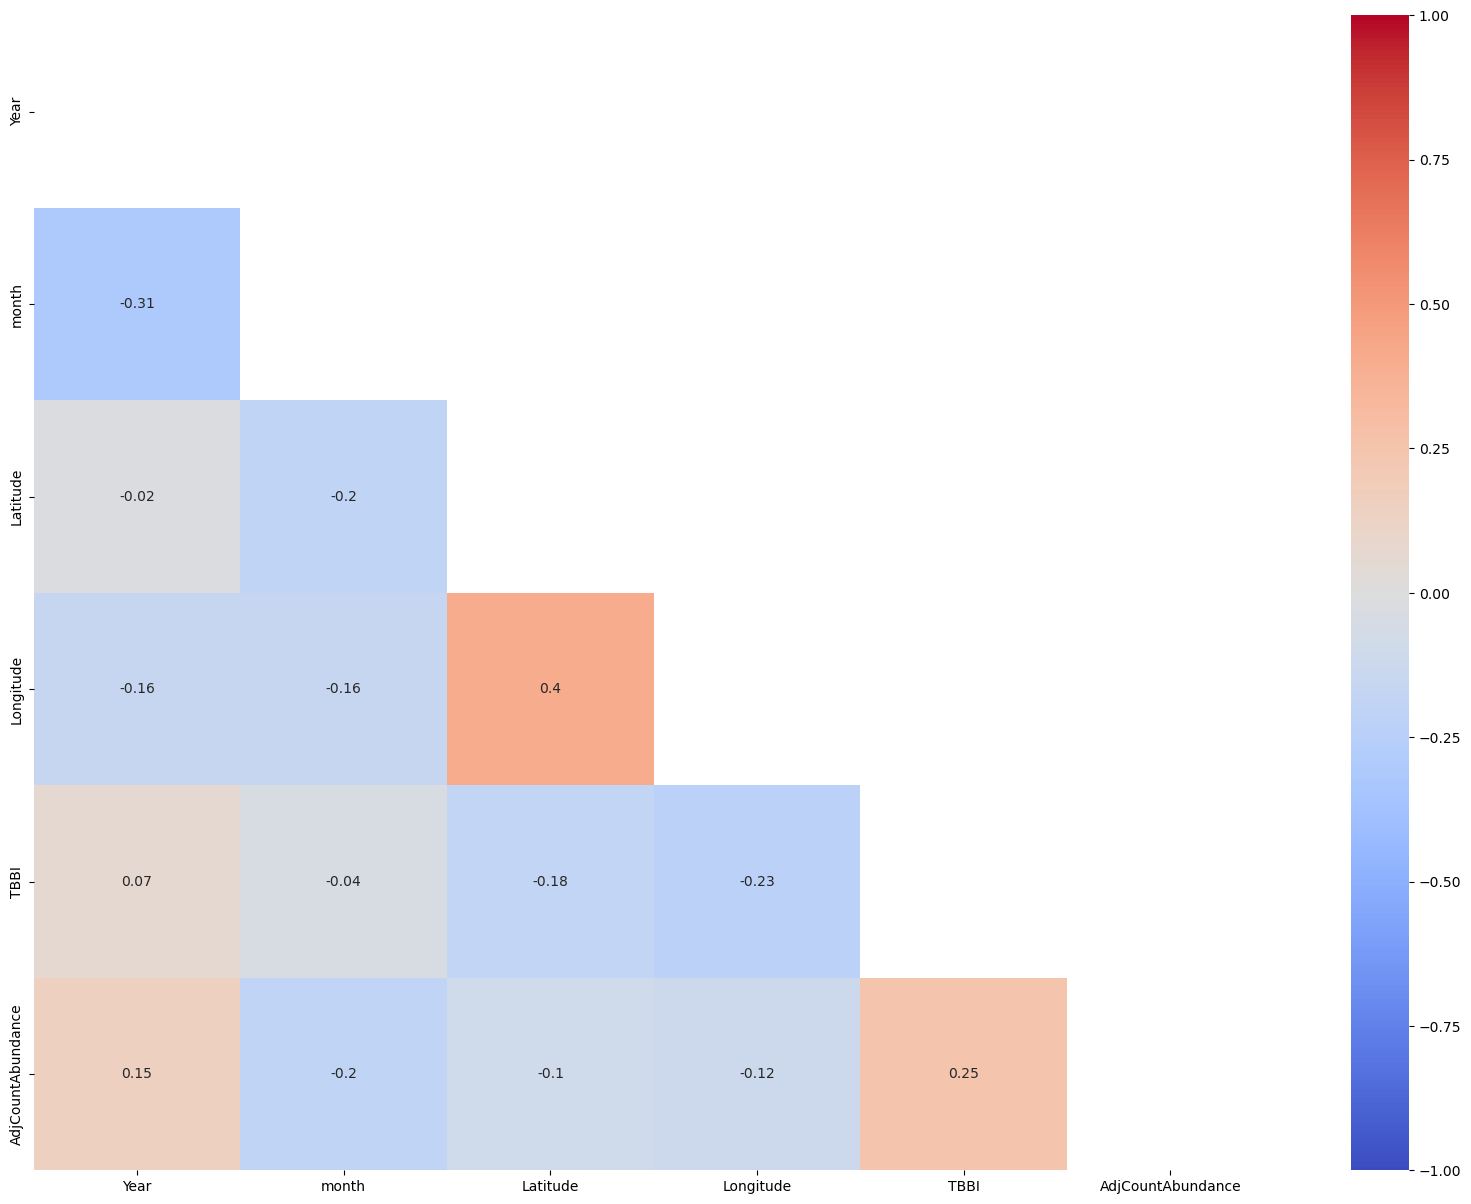

In [299]:
corr=benthic_corr.drop(columns='ShannonDiversity').corr()
mask=np.triu(corr)
plt.figure(figsize=(20,15))
sns.heatmap(corr.round(2), vmax=1,vmin=-1,center=0,cmap='coolwarm',mask=mask, annot=True)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

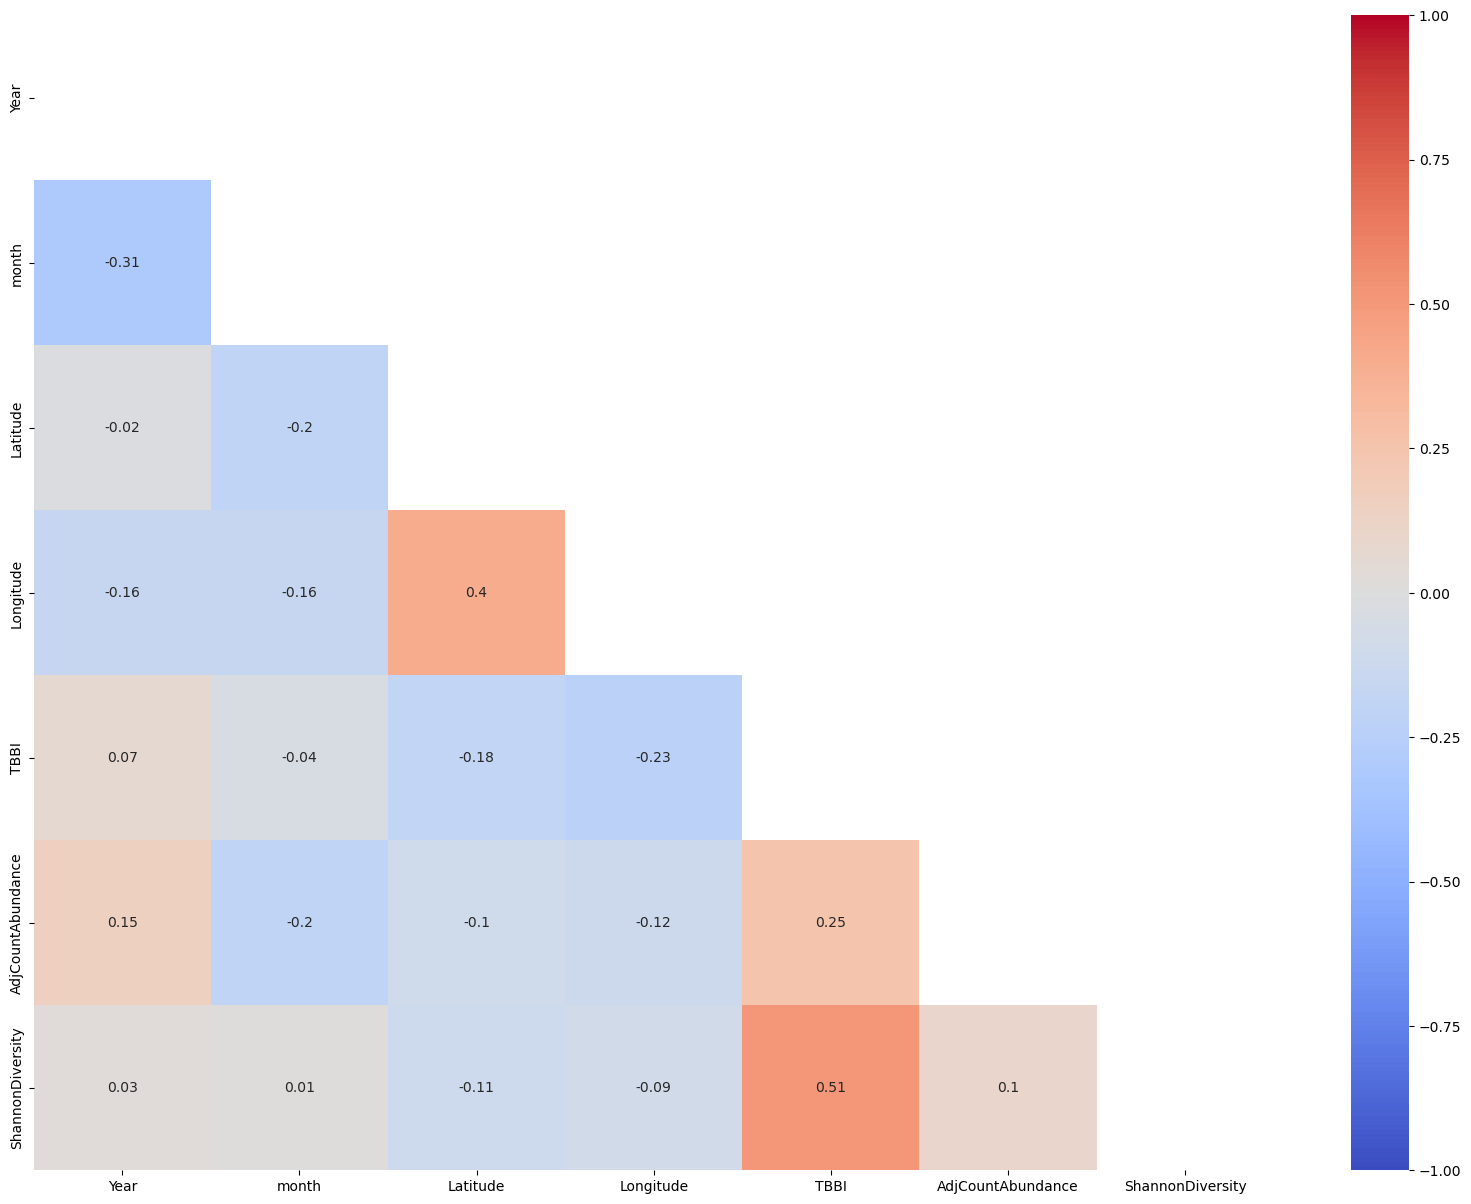

In [298]:
corr=benthic_corr.corr()
mask=np.triu(corr)
plt.figure(figsize=(20,15))
sns.heatmap(corr.round(2), vmax=1,vmin=-1,center=0,cmap='coolwarm',mask=mask, annot=True)
plt.show

In [311]:
benthic_corr.isna().value_counts()

Year   month  Latitude  Longitude  TBBI   AdjCountAbundance  ShannonDiversity
False  False  False     False      False  False              False               4568
                                   True   True               True                 219
Name: count, dtype: int64

In [315]:
benthic_corr.dropna(inplace=True)

C:\Users\Ajax\AppData\Local\Temp\ipykernel_45136\4009152946.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [404]:
benthic_corr.shape

(4568, 7)

<Axes: xlabel='Year', ylabel='ShannonDiversity'>

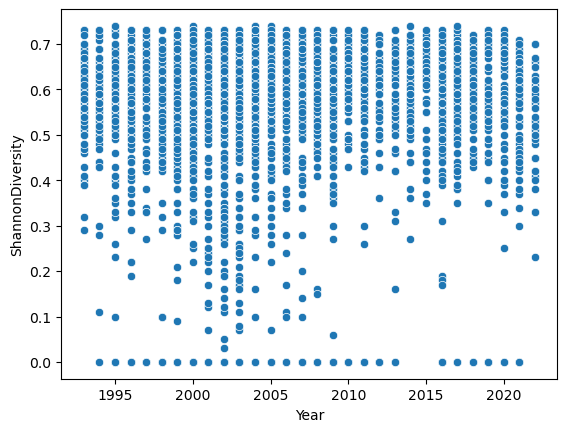

In [412]:
sns.scatterplot(x=benthic_corr.Year,y=benthic_corr.ShannonDiversity)

<Axes: xlabel='AdjCountAbundance', ylabel='ShannonDiversity'>

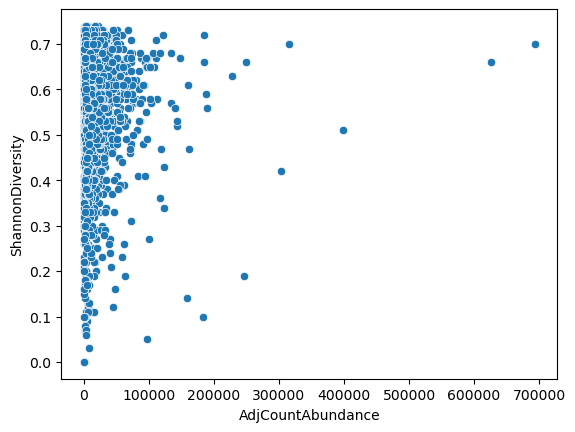

In [409]:
sns.scatterplot(x=benthic_corr.AdjCountAbundance,y=benthic_corr.ShannonDiversity)

In [ ]:
benthic_corr.drop(columns='ShannonDiversity')

In [447]:
X_train, X_test, y_train, y_test = train_test_split(benthic_corr.drop(columns='ShannonDiversity'), benthic_corr.ShannonDiversity, test_size=0.2, random_state=42)

In [414]:
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [415]:
LinReg_benthic=LinearRegression()
LinReg_benthic.fit(X_train,y_train)

LinearRegression()

In [416]:
LinReg_benthic.score(X_train,y_train)

0.27743599677647934

In [417]:
LinReg_benthic.score(X_test,y_test)

0.23174778627122627

In [418]:
# L1
myLasso_benthic=Lasso()
# L2
myRidge_benthic=Ridge()

In [419]:
myLasso_benthic.fit(X_train,y_train)

Lasso()

In [420]:
myRidge_benthic.fit(X_train,y_train)

Ridge()

In [421]:
print(f"The testing R^2 of Lasso Regression is: {myLasso_benthic.score(X_test, y_test)}")
print(f"The testing R^2 of Ridge Regression is: {myRidge_benthic.score(X_test, y_test)}")

The testing R^2 of Lasso Regression is: -2.128567856529706e-05
The testing R^2 of Ridge Regression is: 0.23175341463056698


In [433]:
from sklearn.feature_selection import f_regression #evalution metric, because we are predicting a continuous variable

In [453]:
benthic_corr.feature_names

AttributeError: 'DataFrame' object has no attribute 'feature_names'

In [428]:
myRidge_benthic.coef_

array([ 0.00350142,  0.00473842, -0.00641467,  0.00807598,  0.10270951,
       -0.00634674])

In [456]:
train_scores = []
test_scores = []

#find values of K (number of features) to loop through!
ks = [1,2,3,4,5,6]

for k in ks:
    #instantiate the KBest model
    model = SelectKBest(f_regression, k = k).fit(X_train, y_train)
    X_train_selected = model.transform(X_train) #this step reduces the number of features in X_train
    X_test_selected = model.transform(X_test)

    LR = LinearRegression()
    LR.fit(X_train_selected, y_train)

    #let's print out which exact features are left in the model at each value of K!
    print(f"K = {k}, {np.array(benthic_corr.drop(columns='ShannonDiversity').columns)[model.get_support()]}")

    train_scores.append(LR.score(X_train_selected, y_train))
    test_scores.append(LR.score(X_test_selected, y_test))

K = 1, ['TBBI']
K = 2, ['Latitude' 'TBBI']
K = 3, ['Latitude' 'TBBI' 'AdjCountAbundance']
K = 4, ['Latitude' 'Longitude' 'TBBI' 'AdjCountAbundance']
K = 5, ['Year' 'Latitude' 'Longitude' 'TBBI' 'AdjCountAbundance']
K = 6, ['Year' 'month' 'Latitude' 'Longitude' 'TBBI' 'AdjCountAbundance']


In [457]:
train_scores

[0.27402615327668345,
 0.27443099196776366,
 0.2757454952083416,
 0.27683022939336077,
 0.2769316260293224,
 0.27743599677647945]

Year


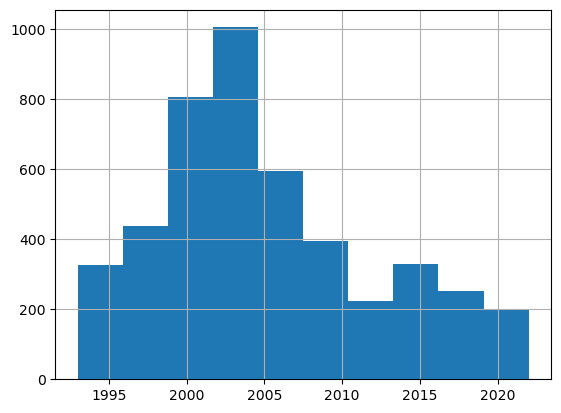

month


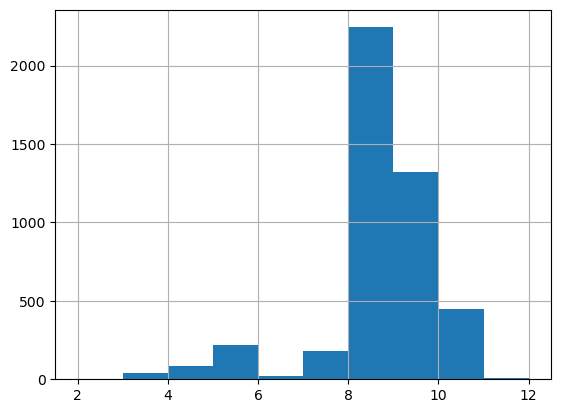

Latitude


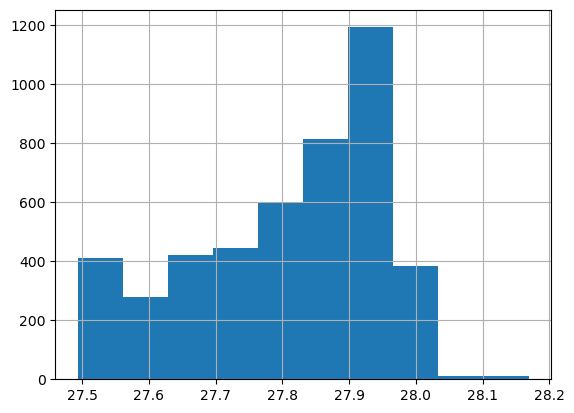

Longitude


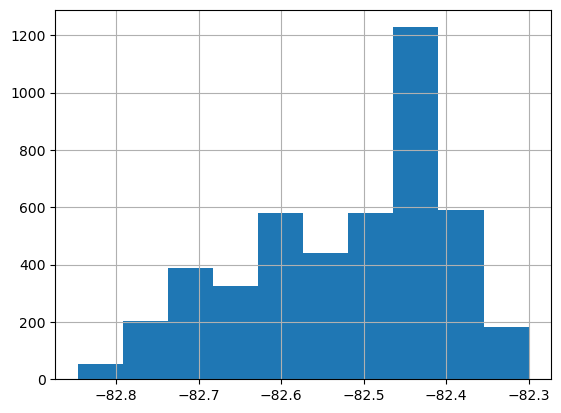

TBBI


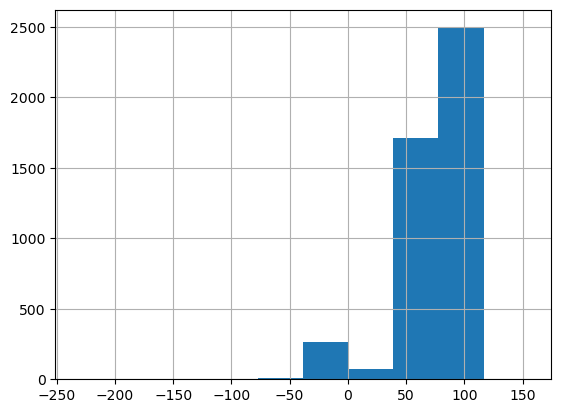

AdjCountAbundance


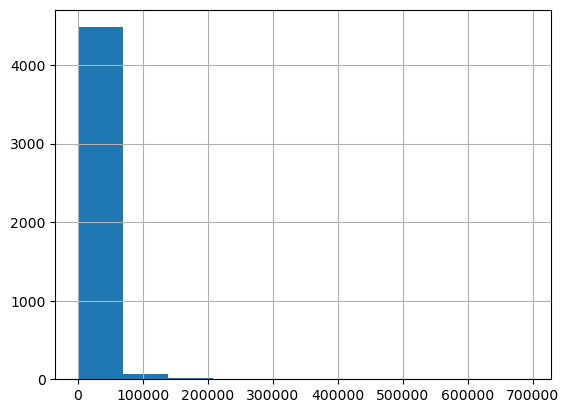

ShannonDiversity


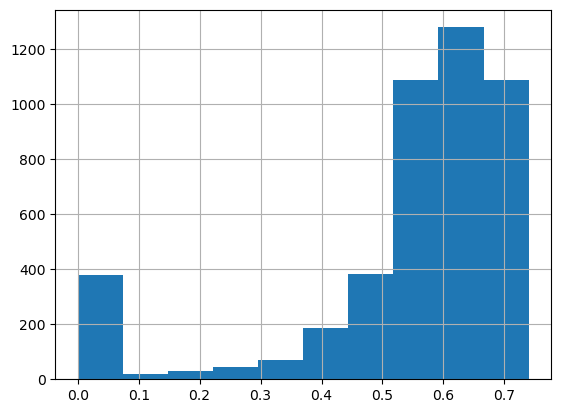

In [462]:
for i in benthic_corr.columns:
    print(i)
    benthic_corr[i].hist()
    plt.show()

In [436]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

#### Population and Development

In [ ]:
os.chdir()

##### Scrap

In [ ]:
####

In [446]:
X_train

array([[-0.8557209 , -0.12540009,  0.37388503,  1.495652  , -0.21221512,
         0.42185753],
       [-0.43857266, -0.12540009,  0.34884805,  1.37670453,  0.41497193,
         0.36505767],
       [ 0.25667441, -0.12540009,  0.94515023,  1.15707586,  0.04008854,
        -0.43711568],
       ...,
       [ 0.25667441, -0.12540009,  1.10595408, -0.26803601,  0.50145455,
        -0.24080742],
       [ 1.09097089, -0.12540009,  0.40811378, -0.74322055,  0.73796574,
         0.62414472],
       [-0.8557209 ,  1.39943166,  0.02225369,  0.44186956,  0.36233033,
        -0.25276528]])

In [ ]:
f_regression_b=f_regression(X_train.AdjCountAbundance,y_train)

In [ ]:
SelectKBest(f_regression_b,k=k).fit(X_train[0],y_train)

In [444]:
X_train[0]

array([-0.8557209 , -0.12540009,  0.37388503,  1.495652  , -0.21221512,
        0.42185753])